# Introduction

This machine learning problem is titled Click-Through Rate Prediction. 
The data for this problem comes from a competition posted on the website Kaggle. 
As per the instructions on the website, the goal of the competition is to find someone who can develop a program that can effectively classify whether something called a click through has occurred on an online advertisement. In analysing online activity, click throughs are defined as when, while surfing the web, someone sees an ad or a link on a webpage and clicks on it as opposed to simply scrolling past. This behaviour indicates that they are interested in the ad and want to get more information about the product or service being offered. Hence, in online advertising, click-through rate (CTR) is a very important metric for evaluating ad performance. As optimizing CTR is of significant importance for advertising companies, click through prediction systems are essential and are commonly used for both sponsored searches and real-time bidding. These systems are often supported by various machine learning algorithms. Thus, through the optimization and continuous evaluation of their machine learning programs, companies continue to search for ways to increase their CTR.

# Exploratory Data Analysis

Initially, in deciding how best to approach this machine learning problem, properly understanding the structure and nature of the data provided in the various datasets on the Kaggle website was of paramount importance. Specifically, the data came in the form two different data sets, the training data set and the test data set. Initially, I imported both datasets to examine them more closely. After importing them both, I began working with the training dataset to develop the machine learning model to be later employed on the test dataset. In importing the training dataset, because the data comes in a specific format called a gz file, a unique unzipping method had to be used to open the data file. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import preprocessing
import pandas as pd
import gzip
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
import xgboost as xgb

In importing the data, I also made some slight changes to its composition, specifically, I changed the variable hour into a datetime variable, which will make it much easier to model this variable later. I also added a sample size variable to make the dataset easier to manage later on. After successfully importing the dataset, I began by printing the head of the dataframe. In machine learning, one of the most important elements of a dataset is the number of features it has. By printing the head of the dataframe, I could easily see the number of features, their respective datatypes and the overall nature of the data. The result of this can be seen below. 

In [2]:
n = 40428967 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

In [3]:
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open('/Users/wmeikle/Downloads/avazu-ctr-prediction-3/train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, skiprows = skip_values)

train.head()

/var/folders/k4/qwxkdjvd59x4b8wd12gnq86c0000gn/T/ipykernel_14996/4148211152.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10006490708516192015,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100083,79
1,10010924186026106882,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
2,10050238981989108169,0,2014-10-21,1005,0,9b124c1e,db7a8013,f028772b,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
3,10057092029491427808,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
4,10057518165096697011,1,2014-10-21,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,2,16920,320,50,1899,0,431,-1,117


Below is the import of the test dataset as well as the head of the test dataframe.

In [4]:
with gzip.open('/Users/wmeikle/Downloads/avazu-ctr-prediction-3/test.gz') as f:
    test = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, skiprows = skip_values)

test.head()

/var/folders/k4/qwxkdjvd59x4b8wd12gnq86c0000gn/T/ipykernel_14996/4148211152.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')


,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10005699539312355785,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,3c4b944d,2347f47a,0f2161f8,...,1,0,20153,320,50,2307,3,163,100020,61
1,1001056425723543749,2014-10-31,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,23723,320,50,2716,3,47,-1,23
2,10055818496900469241,2014-10-31,1005,0,c96057c1,9425ad2a,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,23722,320,50,2716,3,47,100188,23
3,10066861334936703647,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,3c4b944d,2347f47a,0f2161f8,...,1,0,20751,320,50,1895,0,681,100028,101
4,10068582147527537382,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,73206397,2347f47a,8ded1f7a,...,1,0,18987,320,50,2158,3,291,100190,61


Based on the results of the training dataset table, we can see that there are many important features that compose this dataset. For example, we can see that the data is divided based on separate features associated with id, hour, banner_pos, site_id, site_domain, site_category, app_id, app_domain, device_type and device_conn_type. There are also several different categories labelled as C1, as well as C14 through C21. While the meaning of the other features is clearly discernible based on their names, it is unclear what these features with C labels mean. We will look to explore them more later. Besides these features, we also see that, by examining the click variable name, because this is a dataset with a binary output label,1 meaning click through and 0 meaning not, employing a classification machine learning algorithm to the problem would seem to make the most sense. We can also view the datatypes of the different variables in the dataset. In the context of the EDA, it is important to understand what each of these variables mean as well as their data type.

In [5]:
train.dtypes

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
dtype: object

Based on this chart, we can see that most of the variables are integers, with several of them also being objects. In defining these different variables, we generate the following list:

* id: defined as the ad identifier
* click:  0/1 for non-click/click
* hour: format is year/month/day/hour
* C1: unknown category of variable
* banner_pos: position where the add may be displayed
* site_id: ID of the website
* site_domain: domain where the site is hosted 
* site_category: category to which the site belongs
* app_id: application ID, app_domain: application domain
* app_category: application category
* device_id: ID of the device from which the ad is clicked
* device_ip: Network IP to which the device was connected
* device_model: model of the device
* device_type: type of device
* device_conn_type: connection type
* C14-C21: unknown categorical variables.

Next, we can find the shape of the dataset.

In [6]:
train.shape

(1000000, 24)

We can see that the data is 100000 rows low and 24 columns or features wide. This figure and the ones before it give us a good general idea of the nature of the dataset. However, before we can begin to develop a machine learning model, a more in depth understanding of the data is crucial. One of the best and easiest ways to get a good idea of the nature of the data in terms of its variance and spread is by using descriptive statistics. Hence, the descriptive statistics for the numeric variables contained in the dataset can also be seen below.

In [7]:
train.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.211055e+18,0.169708,1004.968824,0.288019,1.015731,0.332176,18841.671294,318.881168,60.187418,2112.695000,1.432648,226.996308,53215.123146,83.275926
std,5.328820e+18,0.375376,1.091860,0.509859,0.526860,0.855774,4961.101084,21.213909,47.588809,609.407378,1.326727,350.889194,49956.977389,70.232015
min,2.094894e+13,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.587719e+18,0.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.210694e+18,0.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000
75%,1.382562e+19,0.000000,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100094.000000,101.000000
max,1.844673e+19,1.000000,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000


In analysing the descriptive statistics seen above, we can see that, in terms of the output label, click, that there is a relatively wide spread of data. This will potentially affect the parameters we apply to our machine learning model later. We can also see that the other features banner_pos, site_id, site_domain, site_category, app_id, app_domain, device_type, device_conn_type as well as the features labelled C all have some variation. This means that conducting a more in-depth analysis of these different features could be beneficial to see which of their values has the strongest correlation with CTR. In general, we see that the number of observations in the dataset is very high. This means we may have to scale down the model in order to achieve better results. In order to accomplish this, I set a lower sample limit, and re imported the respective datasets another time.  We should also check to see if there are any missing values.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1000000 non-null  uint64        
 1   click             1000000 non-null  int64         
 2   hour              1000000 non-null  datetime64[ns]
 3   C1                1000000 non-null  int64         
 4   banner_pos        1000000 non-null  int64         
 5   site_id           1000000 non-null  object        
 6   site_domain       1000000 non-null  object        
 7   site_category     1000000 non-null  object        
 8   app_id            1000000 non-null  object        
 9   app_domain        1000000 non-null  object        
 10  app_category      1000000 non-null  object        
 11  device_id         1000000 non-null  object        
 12  device_ip         1000000 non-null  object        
 13  device_model      1000000 non-null  object 

We can see that there are no missing values. This means we do not need to make any adjustments to addess this issue. After developing a proper understanding of the features and composition of the data, visualizing the data was the most important step. In order to do this, I initially generated a pair plot to visualize the relationship between the different variables.

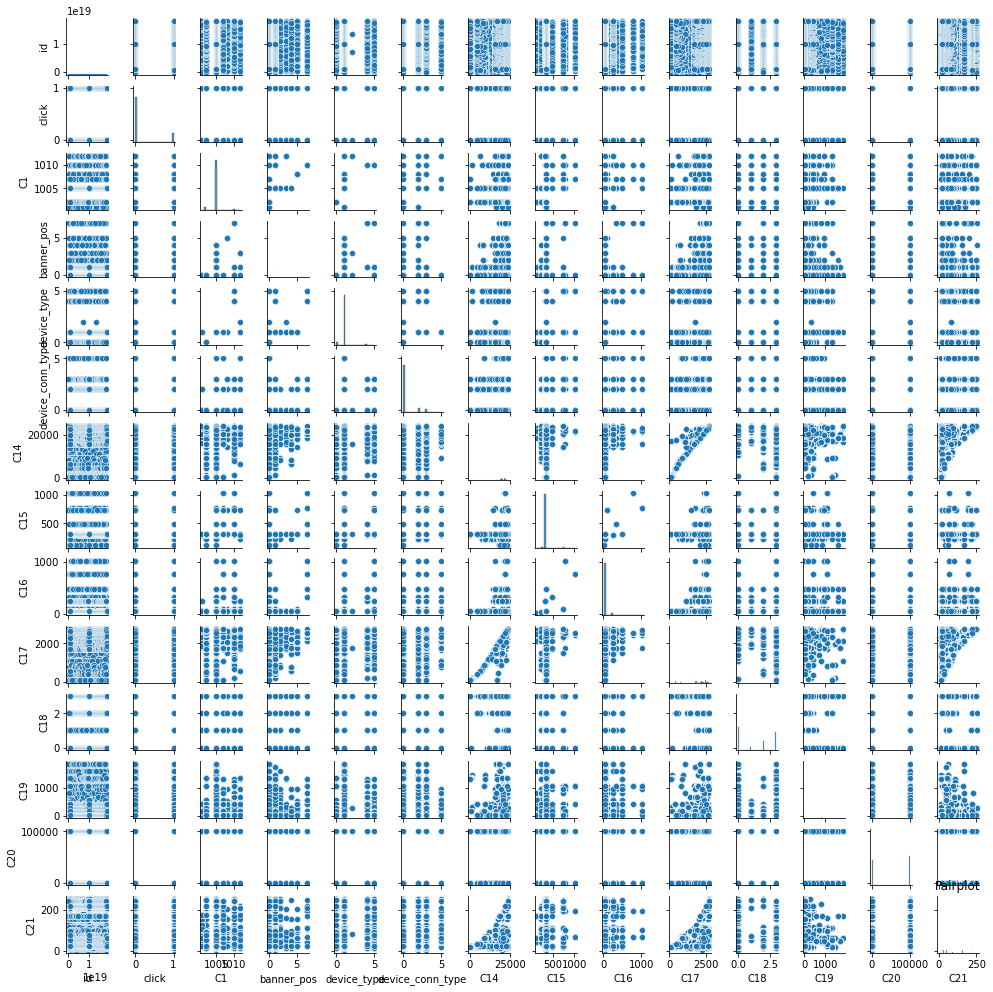

In [9]:
sns.pairplot(train, height = 1);
plt.title('Pairplot')
plt.show()

In analsing the pairplot, we notice several things. Specifically, we can see that several of the different C labelled features have strong correlations with each other. An example of this is C14 and C17. This correlation can be modelled in a more accessible way by using a heatmap. This can be seen below.

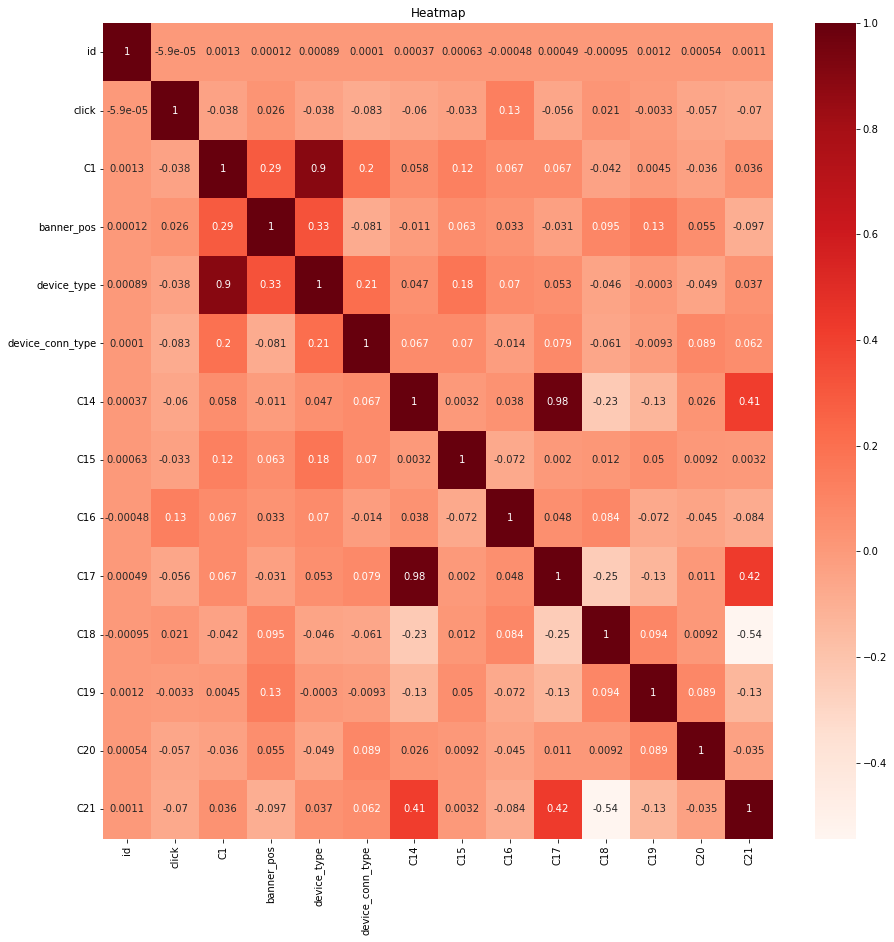

In [10]:
cor = train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Heatmap')
plt.show()

Based on this visual, we can also see thet device id and C1 are also strongly correlated. This may become relevant later as we try to improve our machine learning model. Next, because we are observing clicks per hour over a given set of time, I decided it would be a good idea to visualize the click data provided in the training dataset in a couple of different ways. Initially, in examining the data, it made the most sense to visualize the data based on the number of clicks in the total number of observations. Hence, I initially designed a histogram of the number of clicks, which can be seen below.

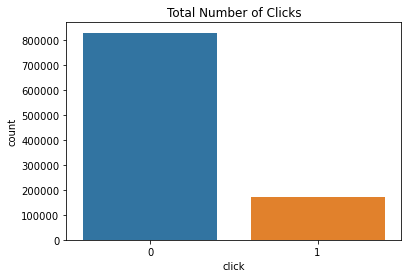

In [11]:
sns.countplot(x='click',data=train)
plt.title('Total Number of Clicks');
plt.show();

We can also view the total number of click throughs as a percentage.

In [12]:
train['click'].value_counts()/len(train)

0    0.830292
1    0.169708
Name: click, dtype: float64

Thus, we see that, based on the histogram and numerical calculations, about 17% of all impressions were click throughs. In online advertising, an ad impression is defined as when a person sees an ad on a webpage. This person then makes the decision whether or not to click on the ad. This means about 83% of people did not click though on the ads. Moving on, because this data is in part time series data with the click data being provided along with the hour and day that the data was collected, we can also visualize the number of clicks in the dataset across a variety of different time frames. This is where the datetime variable that was generated earlier comes in handy. Initially, we can take a closer look on the hour variable to get a better idea of how we can plot it.

In [13]:
train['hour'].describe()

/var/folders/k4/qwxkdjvd59x4b8wd12gnq86c0000gn/T/ipykernel_14996/54622670.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train['hour'].describe()


count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    11071
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

We see based on the above figure that the hour variable measures the hours in the day over several different dates. We will begin by organizing the number of clicks by the hour as is. In this case, the hour variable refers to the hour on the specific date that the data was collected. Thus, this graph is more along the lines of graphing the number of clicks per hour by date, The result of this depiction can be seen below.

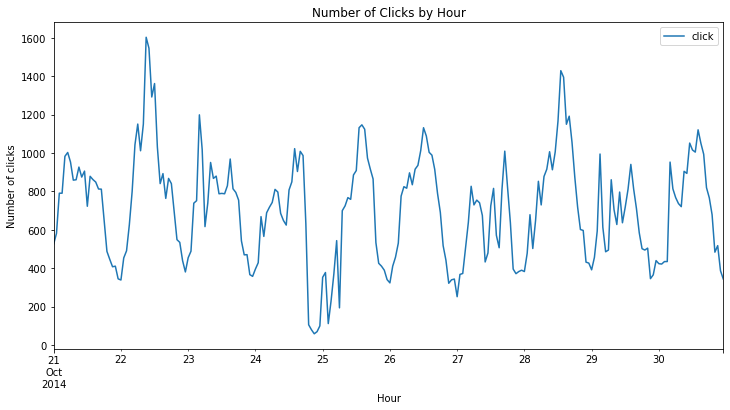

In [14]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.xlabel('Hour')
plt.title('Number of Clicks by Hour');

We see that a period at around midday on the 22nd and the 28th had the most clicks overall. This implies that this period, around midday, is the most active period for consumers in clicking on ads. There is also significant drop off in clicks on the night of the 24th. We can also view the trends of the clicks in the different hours of the day. This requires we generate a new variable called hour of day. This visualization can be seen below.

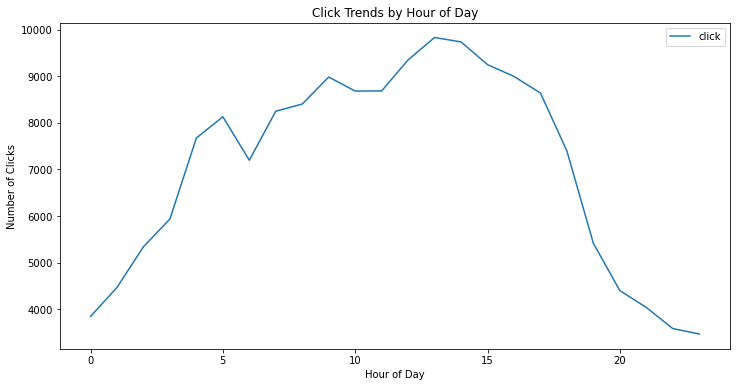

In [15]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of Clicks')
plt.xlabel('Hour of Day')
plt.title('Click Trends by Hour of Day');

We see that at about hour 13 to 14, there is the highest number of clicks in the day, with a significant drop off after hour 15. When compared to the previous chart, the results seem to be consistent, the time when there are the most clicks on advertisements is about midday. After understanding the trends of the number of clicks over time, we can also examine the number of clicks there are vis a vis impressions per hour. Based on the percentage of clicks vis a vis impressions, we can thus measure the effectiveness of an ad campaign. The number of clicks as compared to total impressions in the dataset by hour can be seen below.

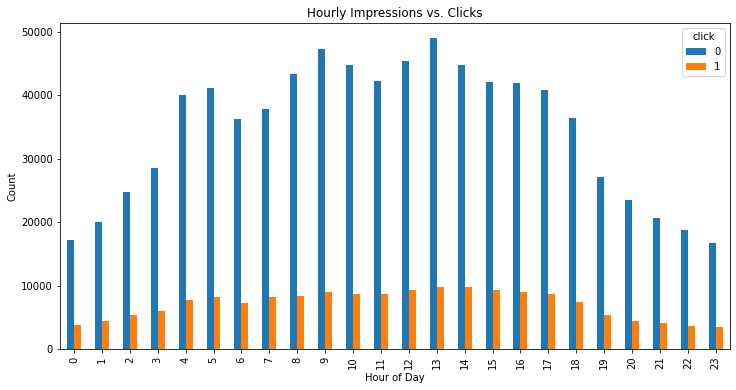

In [16]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('Count')
plt.xlabel('Hour of Day')
plt.title('Hourly Impressions vs. Clicks');

In the above figure, while we can get a good idea of the total amount of clicks vis a vis the total number of impressions for each hour of the day in the dataset, it is still difficult to see the CTR. We can see that certain hours, such as hour 13 and hour 9 had a larger amount of ad impressions and clicks, but it is unclear whether those days also had a higher rate of clicks. Hence, visualizing the CTR by hour as the next step makes the most sense. Using this data, we can also calculate the CTR for the different hours in the day. The CTR for each hour of the day as expressed as a percentage can then be seen below.

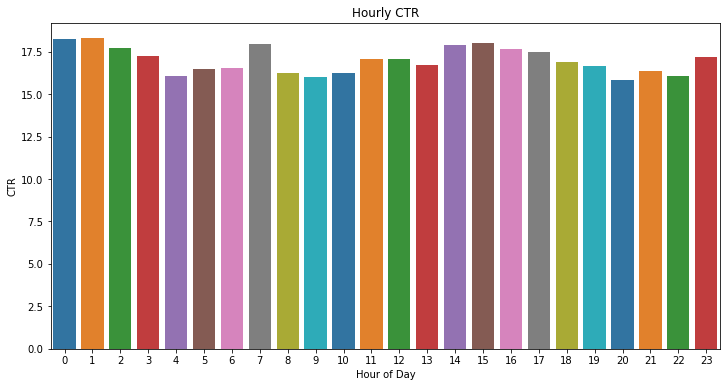

In [17]:
df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour, palette = 'tab10')
plt.xlabel('Hour of Day');
plt.title('Hourly CTR');

In analyzing this graph, we see that hours 1 and hour 16 through 17 of the day had the highest click through rates. This contradicts our earlier finding that indicates that the highest number of clicks were in the middle of the day. Since we are focusing on CTR in this machine learning problem, this is very significant. This graph indicates that the most active times for clicking on ads for consumers is about 1 in the morning and about 4 to 5 in the evening. Next, besides organizing it based on hour of the day, we can also organize the data by days of the week. This again requires that we generate a new variable for day of the week. A plot of the number of clicks vs days of the week can be seen below.

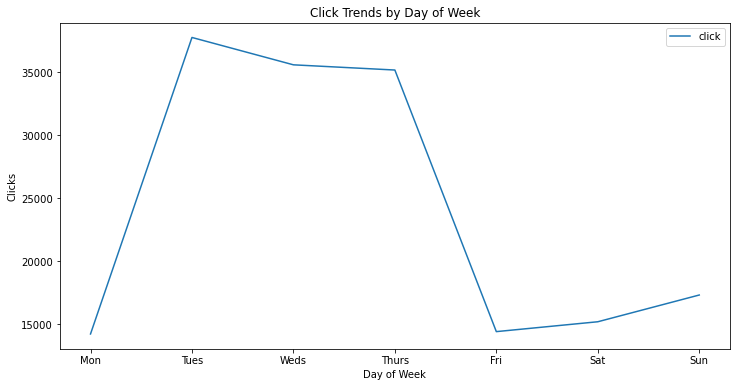

In [18]:
train['my_dates'] = pd.to_datetime(train['hour'])
train['day_of_week'] = train['my_dates'].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.xlabel('Day of Week')
plt.ylabel('Clicks')
plt.title('Click Trends by Day of Week');

Based on this graph, we can see that Tuesday through Thursday had the most clicks, with a significant drop off occurring going into Friday through Monday. We can also model the number of impressions vs clicks by day of the week.

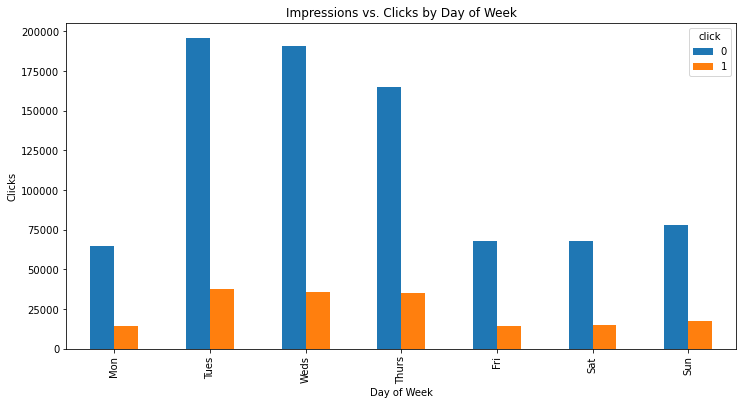

In [19]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.ylabel('Clicks')
plt.xlabel('Day of Week')
plt.title('Impressions vs. Clicks by Day of Week');


This graph shows that Tuesday, Wednesday and Thursday had the most clicks as well as overall impressions. However, again it is difficult to use this graph to discern the CTR. Thus, we can also express the CTR as a percentage by day of the week. This graph can be seen below.

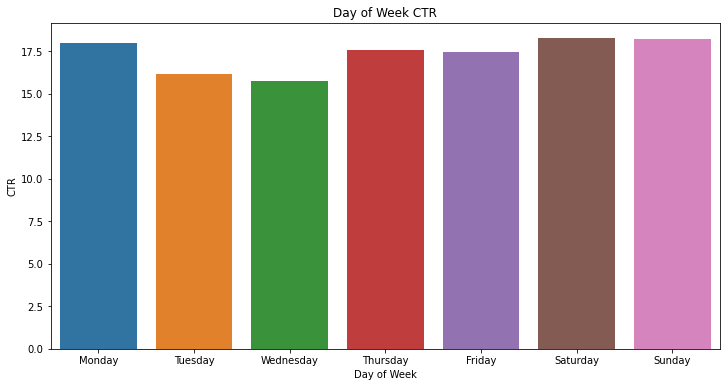

In [20]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('CTR')
plt.xlabel('Day of Week')
plt.title('Day of Week CTR');

In observing this graph, we see that Monday had the highest CTR followed by Saturday and Sunday. Thus, although Tuesday and Wednesday had the highest number of clicks overall, Monday has the highest CTR. Thus, having ads displayed on Monday would seem to be particularly beneficial for advertising companies. Next, we can print the head of the training dataset once more to see which features to examine next.

In [21]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,hour_of_day,my_dates,day_of_week
0,10006490708516192015,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100083,79,0,2014-10-21,Tuesday
1,10010924186026106882,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,320,50,2161,0,35,-1,157,0,2014-10-21,Tuesday
2,10050238981989108169,0,2014-10-21,1005,0,9b124c1e,db7a8013,f028772b,ecad2386,7801e8d9,...,320,50,2161,0,35,-1,157,0,2014-10-21,Tuesday
3,10057092029491427808,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,0,2014-10-21,Tuesday
4,10057518165096697011,1,2014-10-21,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,320,50,1899,0,431,-1,117,0,2014-10-21,Tuesday


Moving on to some of the more specific features contained within the dataset, including the features labeled C, we can break each one of them down individually to see their relationship with the output variable. Beginning with the variable C1, we can visualize the data in C1 to develop a better understanding of this feature. Based on the head of the dataset and the descriptive statistics we obtained earlier, we can see that there are several different values contained within the C1 feature, Thus, we begin by counting the number of times different values occur within the C1 feature. This can be seen below.

In [22]:
print(train.C1.value_counts()/len(train))

1005    0.919113
1002    0.054501
1010    0.022357
1012    0.002754
1007    0.000881
1001    0.000240
1008    0.000154
Name: C1, dtype: float64


Subsequently, we can also visualize the number of clicks vs impressions for values in the C1 label. This can be seen in the histogram below. 

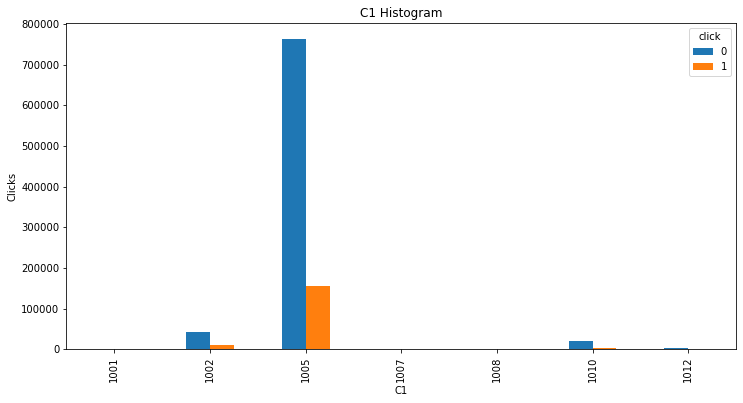

In [23]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 Histogram');
plt.ylabel('Clicks')
plt.xlabel('C1')
plt.show()

We can see that the value 1005 has the greatest amount of impressions and clicks. Next, we can measure the click through rate for each of these values.

In [24]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for value in C1: {},  click through rate: {}".format(i,ctr_avg))

for value in C1: 1001,  click through rate: 0.04583333333333333
for value in C1: 1002,  click through rate: 0.21368415258435625
for value in C1: 1005,  click through rate: 0.16904341468350464
for value in C1: 1007,  click through rate: 0.03859250851305335
for value in C1: 1008,  click through rate: 0.15584415584415584
for value in C1: 1010,  click through rate: 0.09607729122869794
for value in C1: 1012,  click through rate: 0.17247639796659406


 We can also visualize the CTR by value in the C1 feature. This can be seen below.

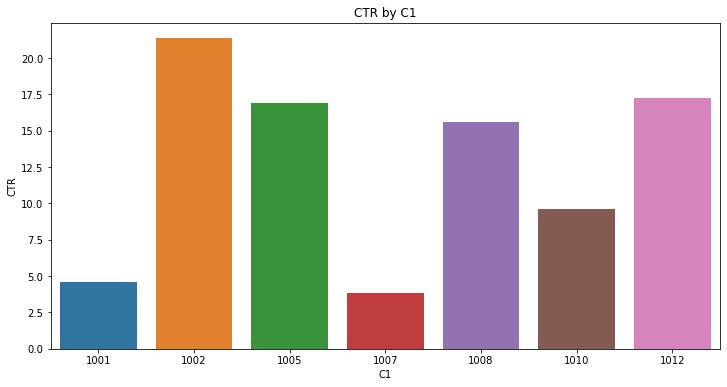

In [25]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

Based on this graph we can see that, although 1005 had the largest amount of click throughs overall, 1002 had the most as a percentage of impressions. Thus, it seems as though adding more ads on value 1002 would be beneficial. Moving on, next we can look at the variable banner position. Similar to previous features, we can also begin by measuring the number of the different values there are in the dataset. 

In [26]:
print(train.banner_pos.value_counts()/len(train))

0    0.720486
1    0.277677
7    0.001164
2    0.000304
4    0.000171
5    0.000154
3    0.000044
Name: banner_pos, dtype: float64


We can also plot a histogram of clicks and total impressions for the different Banner Positions.

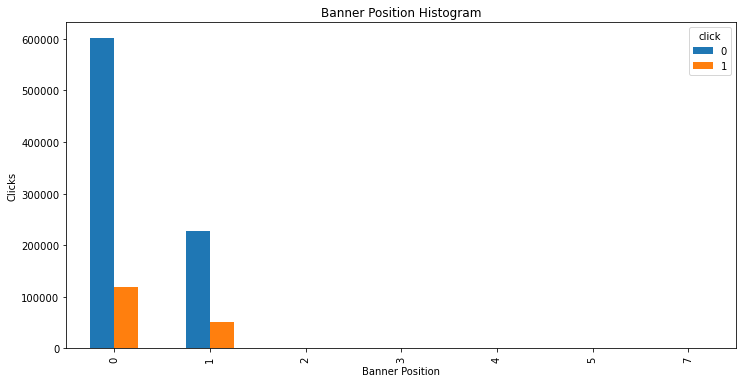

In [27]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Banner Position Histogram');
plt.ylabel('Clicks')
plt.xlabel('Banner Position')
plt.show()

Based on this, we see that banner positions 0 and 1 had the most impressions and number of clicks. We can also plot the CTR for each of the different banner positions.

In [28]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16422387110922348
for banner position: 1,  click through rate: 0.18329209837328983
for banner position: 2,  click through rate: 0.11513157894736842
for banner position: 3,  click through rate: 0.3181818181818182
for banner position: 4,  click through rate: 0.2631578947368421
for banner position: 5,  click through rate: 0.15584415584415584
for banner position: 7,  click through rate: 0.32044673539518903


We can also visualize the CTR for the banner positions. This can be seen below.

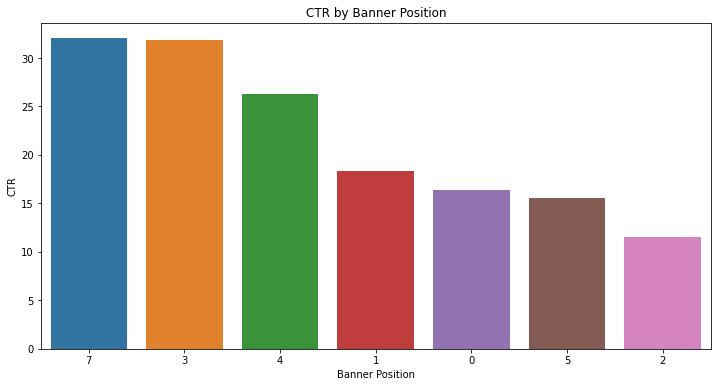

In [29]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.ylabel('CTR')
plt.xlabel('Banner Position')
plt.title('CTR by Banner Position');


Interestingly, we see that the click through rate was actually highest for banner position 7, even though this data wasn’t even visible on the previous graph. Thus, adding more ads on banner position 7 could be beneficial for advertising companies. Moving on from Banner Position, we can also conduct a similar analysis based on Site ID. Initially, we can see how many unique values there are in the site_id feature. This can be seen below.


In [30]:
train.site_id.nunique()

2639

We can also see which Site IDs have the most impressions in the dataset. This can be seen below.

In [31]:
print('The top 10 site ids that have the most impressions')
print((train.site_id.value_counts()/len(train))[0:10])

The top 10 site ids that have the most impressions
85f751fd    0.360865
1fbe01fe    0.160814
e151e245    0.065255
d9750ee7    0.023593
5b08c53b    0.022696
5b4d2eda    0.019139
856e6d3f    0.018697
a7853007    0.011343
b7e9786d    0.009023
5ee41ff2    0.008800
Name: site_id, dtype: float64


Moving on, we can also plot a histogram of clicks vs impressions by Site ID. This can be seen below.

Text(0.5, 0, 'Site ID')

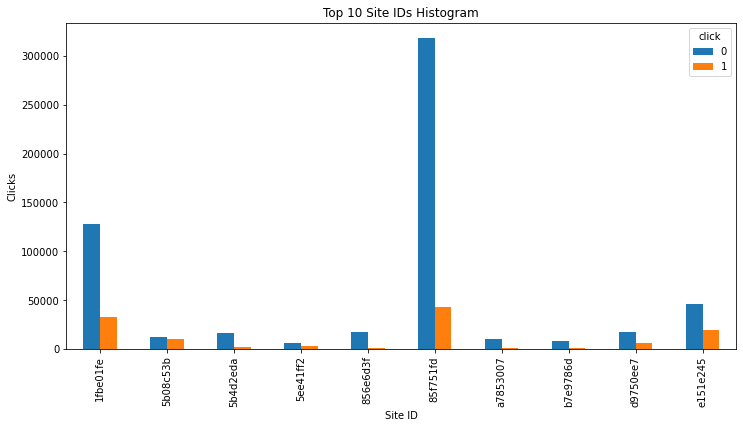

In [32]:
top10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Site IDs Histogram');
plt.ylabel('Clicks')
plt.xlabel('Site ID')

Based on this figure, we see that Site ID 85f751fd had the most impressions as well as clicks. We can also measure the click though rate for each different Site ID. 

In [33]:
top10_ids = (train.site_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_ids:
    click_avg=train.loc[np.where((train.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click through rate: {}".format(i,click_avg))

for site id value: 85f751fd,  click through rate: 0.11904728915245313
for site id value: 1fbe01fe,  click through rate: 0.2039188130386658
for site id value: e151e245,  click through rate: 0.2965443261052793
for site id value: d9750ee7,  click through rate: 0.2797016064086805
for site id value: 5b08c53b,  click through rate: 0.46893725766654915
for site id value: 5b4d2eda,  click through rate: 0.1302575892157375
for site id value: 856e6d3f,  click through rate: 0.04150398459645933
for site id value: a7853007,  click through rate: 0.10261835493255753
for site id value: b7e9786d,  click through rate: 0.07569544497395544
for site id value: 5ee41ff2,  click through rate: 0.32920454545454547


We can then also plot the CTR of the different Site IDs.

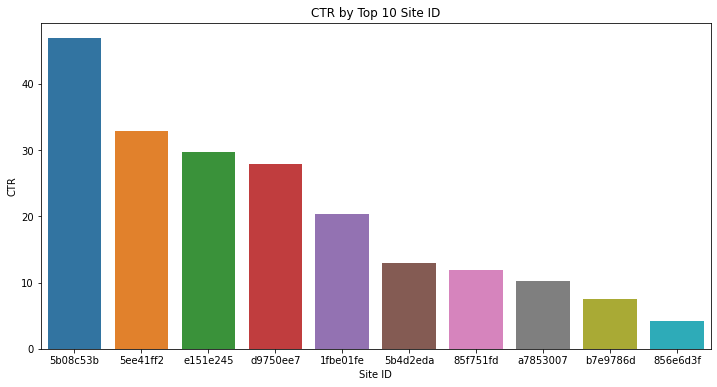

In [34]:
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.ylabel('CTR')
plt.xlabel('Site ID')
plt.title('CTR by Top 10 Site ID');

Thus, we see that although Site ID 85f751fd had the most impressions overall, Site ID 5b08c53b had the highest CTR. Thus, adding more ads on this site ID could be beneficial moving forward. Moving on from Site ID, next we can study Site Domain. In viewing how many unique Site Domains there are in the dataset, we get the figure below.

In [35]:
train.site_domain.nunique()

2808

Next, we can examine which Site Domains had the most impressions overall as a percentage. This can be seen below.

In [36]:
print('The top 10 site domains that have the most impressions')
print((train.site_domain.value_counts()/len(train))[0:10])

The top 10 site domains that have the most impressions
c4e18dd6    0.374035
f3845767    0.160814
7e091613    0.082155
7687a86e    0.032064
98572c79    0.024439
16a36ef3    0.021192
58a89a43    0.018697
9d54950b    0.009471
b12b9f85    0.009140
17d996e6    0.008905
Name: site_domain, dtype: float64


We can also visualize the number of clicks vs impressions by site domain. This can be seen below.

Text(0, 0.5, 'Clicks')

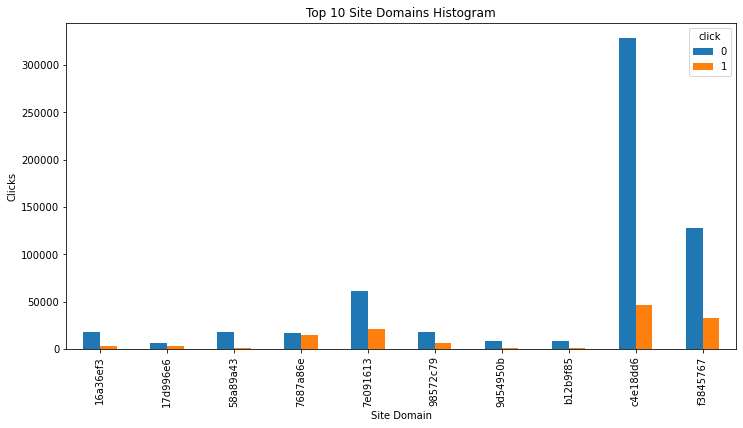

In [37]:
top10_domain = train[(train.site_domain.isin((train.site_domain.value_counts()/len(train))[0:10].index))]
top10_domain_click = top10_domain[top10_domain['click'] == 1]
top10_domain.groupby(['site_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Site Domains Histogram');
plt.xlabel('Site Domain')
plt.ylabel('Clicks')

Based on this graph, we see that site domain c4e18dd6 and site domain f3845767 have the largest amount of clicks as well as impressions. Subsequently, we can see the CTR for each for the top site domain values.

In [38]:
top10_domains = (train.site_domain.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=train.loc[np.where((train.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: c4e18dd6,  click through rate: 0.12303661422059432
for site domain value: f3845767,  click through rate: 0.2039188130386658
for site domain value: 7e091613,  click through rate: 0.25838962935913823
for site domain value: 7687a86e,  click through rate: 0.4622941616766467
for site domain value: 98572c79,  click through rate: 0.27374278816645525
for site domain value: 16a36ef3,  click through rate: 0.14278973197432993
for site domain value: 58a89a43,  click through rate: 0.04150398459645933
for site domain value: 9d54950b,  click through rate: 0.11551050575440819
for site domain value: b12b9f85,  click through rate: 0.07647702407002188
for site domain value: 17d996e6,  click through rate: 0.32667040988208873


Next, we can visualize the CTRs for the different site domains.

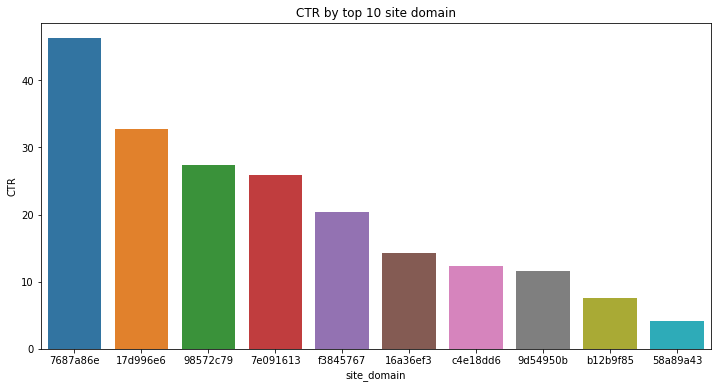

In [39]:
df_domain = top10_domain[['site_domain','click']].groupby(['site_domain']).count().reset_index()
df_domain = df_domain.rename(columns={'click': 'impressions'})
df_domain['clicks'] = top10_domain_click[['site_domain','click']].groupby(['site_domain']).count().reset_index()['click']
df_domain['CTR'] = df_domain['clicks']/df_domain['impressions']*100
sort_domain = df_domain.sort_values(by='CTR',ascending=False)['site_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_domain', data=df_domain, order=sort_domain)
plt.title('CTR by top 10 site domain');

Based on this graph, we can see that the site domain 7687a86e has the highest click through rate. However, we saw eariler that c4e18dd6 and f3845767 had the largest amount of clicks. Thus, adding more ads on site domain 7687a86e could be beneficial. Next, we can also examine the site_category feature. To begin with, we can also examine the number of unique site categories there are in the dataset. This can be seen below.

In [40]:
train.site_category.nunique()

20

Next, we can examine which site categories have the most impressions. This can be seen below.

In [41]:
print('The top 10 site categories that have the most impressions')
print((train.site_category.value_counts()/len(train))[0:10])

The top 10 site categories that have the most impressions
50e219e0    0.408690
f028772b    0.313041
28905ebd    0.182878
3e814130    0.075483
f66779e6    0.006096
75fa27f6    0.004070
335d28a8    0.003395
76b2941d    0.002568
c0dd3be3    0.001037
72722551    0.000713
Name: site_category, dtype: float64


Next, we can generate a histogram of clicks vs total impressions by site category. This figure can be seen below.

Text(0, 0.5, 'Clicks')

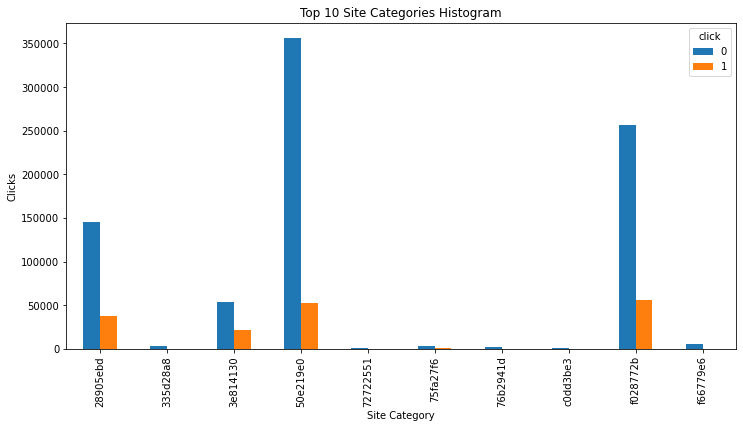

In [42]:
top10_category = train[(train.site_category.isin((train.site_category.value_counts()/len(train))[0:10].index))]
top10_category_click = top10_category[top10_category['click'] == 1]
top10_category.groupby(['site_category', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Site Categories Histogram');
plt.xlabel('Site Category')
plt.ylabel('Clicks')

We see that site category 50e219e0 and f028772b have the highest number of impressions and clicks. Next, we can view CTR by site category.

In [43]:
top10_domains = (train.site_category.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=train.loc[np.where((train.site_category == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: 50e219e0,  click through rate: 0.1290782744867748
for site domain value: f028772b,  click through rate: 0.17917461291012998
for site domain value: 28905ebd,  click through rate: 0.20652566191668761
for site domain value: 3e814130,  click through rate: 0.28418319356676336
for site domain value: f66779e6,  click through rate: 0.03658136482939633
for site domain value: 75fa27f6,  click through rate: 0.11474201474201474
for site domain value: 335d28a8,  click through rate: 0.09219440353460973
for site domain value: 76b2941d,  click through rate: 0.026090342679127725
for site domain value: c0dd3be3,  click through rate: 0.11668273866923819
for site domain value: 72722551,  click through rate: 0.047685834502103785


We can also visualize the CTR of the different Site Categories

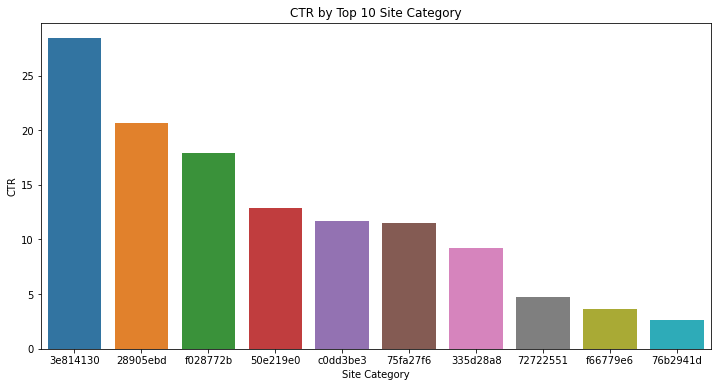

In [44]:
df_category = top10_category[['site_category','click']].groupby(['site_category']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_category_click[['site_category','click']].groupby(['site_category']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['site_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_category', data=df_category, order=sort_category)
plt.xlabel('Site Category')
plt.title('CTR by Top 10 Site Category');

We see that Site Category 3e814130 has the highest CTR. This is in contrast to the site categories that had the highest number of clicks. Thus, it would seem that putting more ads on the site category 3e814130 could be beneficial moving forward. Moving on, we can then view the device ID feature. We can do this by initially seeing how many unique devices their are in the dataset.

In [45]:
train.device_id.nunique()

150152

We can also view the device id's that had the most impresssions overall by percentage.

In [46]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.825296
0f7c61dc    0.000532
c357dbff    0.000493
936e92fb    0.000336
afeffc18    0.000217
b09da1c4    0.000095
d857ffbb    0.000095
987552d1    0.000094
28dc8687    0.000085
cef4c8cc    0.000084
Name: device_id, dtype: float64


We can also plot a barplot of the device IDs with the higest amount of impressions and clicks.

Text(0.5, 0, 'Device ID')

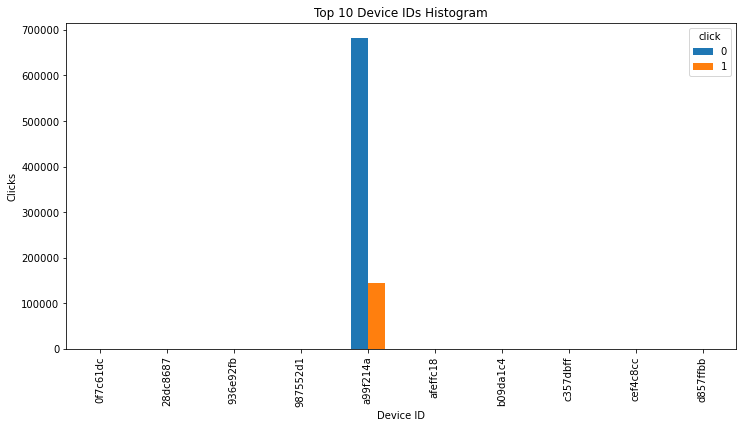

In [47]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Device IDs Histogram');
plt.ylabel('Clicks')
plt.xlabel('Device ID')

We see that device id a991214a had the most clicks and overall impressions. Next we can view the CTR by device id as well.

In [48]:
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.17399211919117505
for device id value: 0f7c61dc,  click through rate: 0.7894736842105263
for device id value: c357dbff,  click through rate: 0.59026369168357
for device id value: 936e92fb,  click through rate: 0.044642857142857144
for device id value: afeffc18,  click through rate: 0.17511520737327188
for device id value: b09da1c4,  click through rate: 0.10526315789473684
for device id value: d857ffbb,  click through rate: 0.28421052631578947
for device id value: 987552d1,  click through rate: 0.0
for device id value: 28dc8687,  click through rate: 0.0
for device id value: cef4c8cc,  click through rate: 0.30952380952380953


We can also visualize the CTR by device ID.

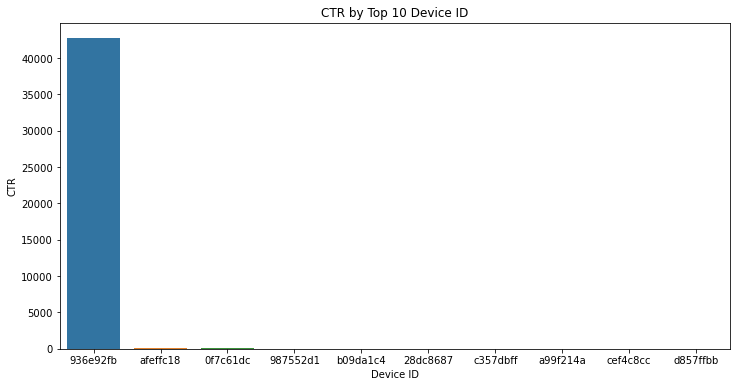

In [49]:
df_category = top10_device[['device_id','click']].groupby(['device_id']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_id','click']].groupby(['device_id']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_id', data=df_category, order=sort_category)
plt.xlabel('Device ID')
plt.title('CTR by Top 10 Device ID');

We can see that the device id 936e92fb has an extremely high CTR even though we couldnt even see this value on the previous graph. Adding more values on this device id could be beneficial for advertising companies. Next, we can study a number of other features in the dataset associated with the devices that users were using when they clicked on the ads. These include device ips, device types, device models and device connection. We can begin by checking how many unique values there are of each of these features in the dataset.

In [50]:
print(str(train.device_ip.nunique()) + " = number of device ips in the dataset")

555706 = number of device ips in the dataset


Next, we can measure the top device ips by percentage of impressions.

In [51]:
print('The impressions by device ips')
print((train.device_ip.value_counts()/len(train)))

The impressions by device ips
6b9769f2    0.005217
431b3174    0.003326
2f323f36    0.002250
af9205f9    0.002197
af62faf4    0.002124
              ...   
f051369d    0.000001
d95ddba6    0.000001
f0bfd5a3    0.000001
749a095c    0.000001
79435f46    0.000001
Name: device_ip, Length: 555706, dtype: float64


Next, we can generate a histogram of the number of clicks vs impressions by device ips.

Text(0.5, 0, 'Device IP')

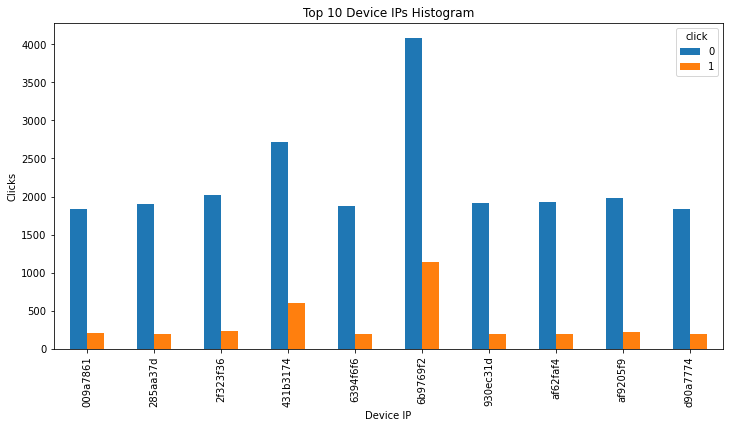

In [52]:
top10_device = train[(train.device_ip.isin((train.device_ip.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_ip', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Device IPs Histogram');
plt.ylabel('Clicks')
plt.xlabel('Device IP')

We can see that the device IPs 6b976912 and 431b3174 had the largest amount of impressions and clicks in the dataset. Next, we can calculate the CTR by device IP.

In [53]:
top10_devices = (train.device_ip.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_ip == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: 6b9769f2,  click through rate: 0.21870806977189955
for device id value: 431b3174,  click through rate: 0.1831028262176789
for device id value: 2f323f36,  click through rate: 0.10266666666666667
for device id value: af9205f9,  click through rate: 0.10059171597633136
for device id value: af62faf4,  click through rate: 0.09274952919020715
for device id value: 930ec31d,  click through rate: 0.09090909090909091
for device id value: 285aa37d,  click through rate: 0.09069212410501193
for device id value: 6394f6f6,  click through rate: 0.09381044487427466
for device id value: 009a7861,  click through rate: 0.10482691370063384
for device id value: d90a7774,  click through rate: 0.09669462259496793


We can next visualize this graph as well.

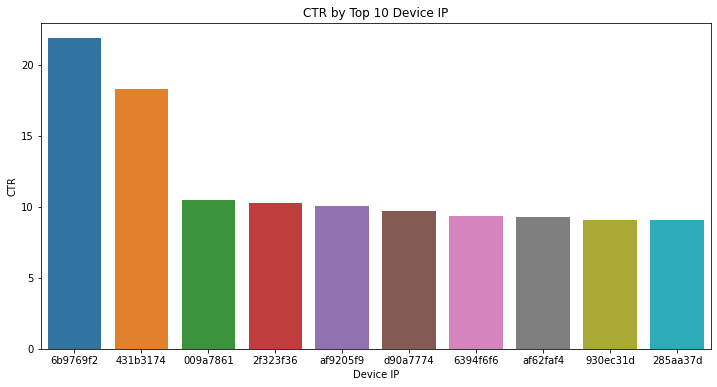

In [54]:
df_category = top10_device[['device_ip','click']].groupby(['device_ip']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_ip','click']].groupby(['device_ip']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_ip'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_ip', data=df_category, order=sort_category)
plt.xlabel('Device IP')
plt.title('CTR by Top 10 Device IP');

We can see that the two sites that had the most impressions also had the highest CTR. Thus, companies should continue emphasizing these device ips. Next, moving on to device types, we can begin by measuring the number of unique values there are in the dataset.

In [55]:
print(str(train.device_type.nunique()) + " = number of device types in the dataset")

5 = number of device types in the dataset


We can then visualize the percentage of impressions there are for each device type.

In [56]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.923140
0    0.054501
4    0.019198
5    0.003159
2    0.000002
Name: device_type, dtype: float64


Next, we can also plot a histogram of impressions vs clicks by device type.

Text(0, 0.5, 'Device Type')

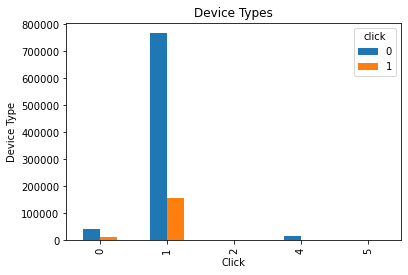

In [57]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='Device Types');
plt.xlabel('Click')
plt.ylabel('Device Type')

We see that device type 1 and 0 had the highest amount of overall impressions and clicks. Next, we can calculate the CTR for each device type.

In [58]:
top10_devices = (train.device_type.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_type == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: 1,  click through rate: 0.16889529215503607
for device id value: 0,  click through rate: 0.21368415258435625
for device id value: 4,  click through rate: 0.09646838212313782
for device id value: 5,  click through rate: 0.0937005381449826
for device id value: 2,  click through rate: 0.0


Next, we can plot the CTR for each device type in a graph.

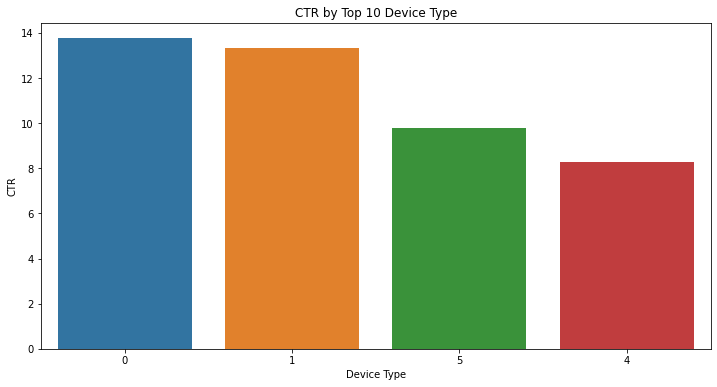

In [59]:
df_category = top10_device[['device_type','click']].groupby(['device_type']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_type','click']].groupby(['device_type']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_type'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_type', data=df_category, order=sort_category)
plt.xlabel('Device Type')
plt.title('CTR by Top 10 Device Type');

Based on this graph, we can see that device type 0 and 1 had the highest CTR. Thus, companies should continue to emphasize these two Device Types. Next, we can also examine the different device models in the dataset, beginning by measuring the number of unique values there are the in the dataset.

In [60]:
print(str(train.device_model.nunique()) + " = number of device models in the dataset")

5162 = number of device models in the dataset


We can also plot which device models have the highest amount of impressions.

In [61]:
print('The impressions by device models')
print((train.device_model.value_counts()/len(train)))

The impressions by device models
8a4875bd    0.061066
1f0bc64f    0.035469
d787e91b    0.034963
76dc4769    0.018862
be6db1d7    0.018373
              ...   
6e37943d    0.000001
b8fcf66d    0.000001
83dc8fcb    0.000001
4cc7a42a    0.000001
7394e735    0.000001
Name: device_model, Length: 5162, dtype: float64


We can also plot a histogram of impressions vs clicks by device model.

Text(0.5, 0, 'Device Model')

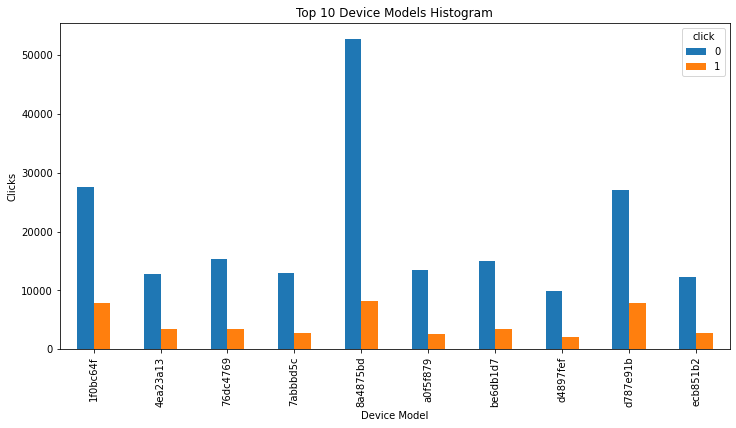

In [62]:
top10_device = train[(train.device_model.isin((train.device_model.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_model', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Device Models Histogram');
plt.ylabel('Clicks')
plt.xlabel('Device Model')

We see that the device models with the largest amount of clicks and overall impressions were 8a4875bd and 1f0bc64f. We can also view the CTR for each device model.

In [63]:
top10_devices = (train.device_model.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_model== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device model value: {},  click through rate: {}".format(i,click_avg))

for device model value: 8a4875bd,  click through rate: 0.1354272426554875
for device model value: 1f0bc64f,  click through rate: 0.2217711240801827
for device model value: d787e91b,  click through rate: 0.22520950719331864
for device model value: 76dc4769,  click through rate: 0.18561128194252996
for device model value: be6db1d7,  click through rate: 0.18554400478963698
for device model value: 4ea23a13,  click through rate: 0.21265116279069768
for device model value: a0f5f879,  click through rate: 0.16437671746190358
for device model value: 7abbbd5c,  click through rate: 0.17217446673034065
for device model value: ecb851b2,  click through rate: 0.18346560846560847
for device model value: d4897fef,  click through rate: 0.1738399462004035


We can also visualize the CTR for the various device models.

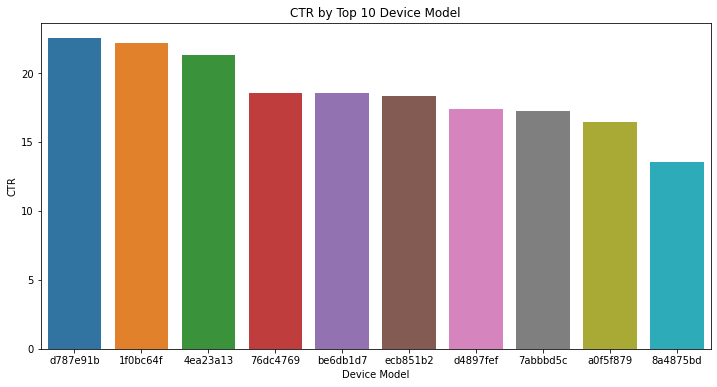

In [64]:
df_category = top10_device[['device_model','click']].groupby(['device_model']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_model','click']].groupby(['device_model']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_model'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_model', data=df_category, order=sort_category)
plt.xlabel('Device Model')
plt.title('CTR by Top 10 Device Model');

We can see that 1f0bc64f had the highest CTR. Thus, companies should continue emphasizing this device model type. However, 8a4875bd is much lower. This means that companies should emphasize other device models to achieve success. Next, we can also study the different device connection types. To begin with, we can see the number of unique device connection types there are below.

In [65]:
print(str(train.device_conn_type.nunique()) + " = number of device connection types in the dataset")

4 = number of device connection types in the dataset


We can also plot the percentage of total impressions there are by device connection type.

In [66]:
print('The impressions by device connection')
print((train.device_conn_type.value_counts()/len(train)))

The impressions by device connection
0    0.862529
2    0.082449
3    0.053916
5    0.001106
Name: device_conn_type, dtype: float64


We can also plot a histogram of clicks vs total impressions by device connection type.

Text(0.5, 0, 'Device Connection Type')

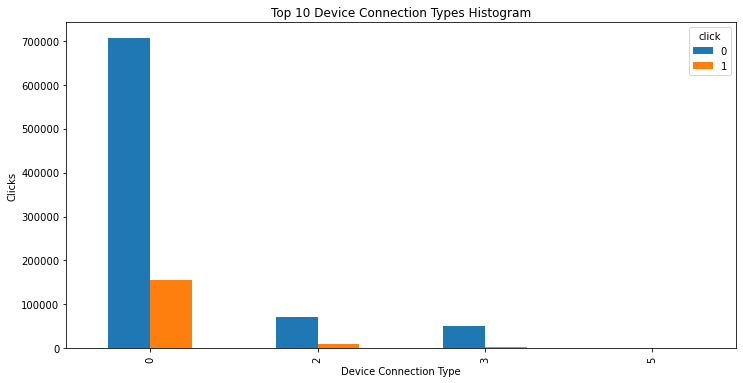

In [67]:
top10_device = train[(train.device_conn_type.isin((train.device_conn_type.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_conn_type', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Device Connection Types Histogram');
plt.ylabel('Clicks')
plt.xlabel('Device Connection Type')

We see that device 0 had the largest amount of clicks and overall impressions. We can also plot the CTR for each device connection type.

In [68]:
top10_devices = (train.device_conn_type.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_conn_type== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device connection type: {},  click through rate: {}".format(i,click_avg))

for device connection type: 0,  click through rate: 0.18099681286078498
for device connection type: 2,  click through rate: 0.13487125374473918
for device connection type: 3,  click through rate: 0.045033014318569625
for device connection type: 5,  click through rate: 0.0406871609403255


We can also visualize the CTR for each device connection type.

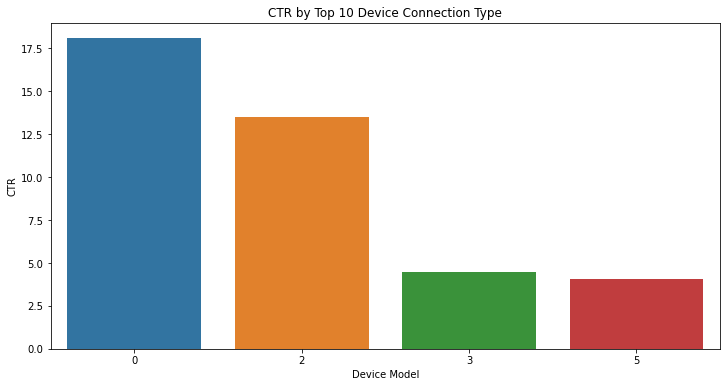

In [69]:
df_category = top10_device[['device_conn_type','click']].groupby(['device_conn_type']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_conn_type','click']].groupby(['device_conn_type']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_conn_type'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_conn_type', data=df_category, order=sort_category)
plt.xlabel('Device Model')
plt.title('CTR by Top 10 Device Connection Type');

We can see that device type 0 had the highest CTR. Thus, companies should continue emphasizing this device connection type. Next, we can also study a few different characteristics of apps incorporated in the dataset. Beginning with App ID, we can see the number of unique App ID values below.

In [70]:
train.app_id.nunique()

3153

We can next view the total percentage of impressions in app ID by the unique values in the category. This can be seen below.

In [71]:
print('The impressions by app ID')
print((train.app_id.value_counts()/len(train)))

The impressions by app ID
ecad2386    0.639135
92f5800b    0.038232
e2fcccd2    0.027894
febd1138    0.018823
9c13b419    0.018707
              ...   
42360604    0.000001
c2d8cb02    0.000001
90a180a0    0.000001
ecc0559b    0.000001
2697b5da    0.000001
Name: app_id, Length: 3153, dtype: float64


We can also plot a histogram of the the number of clicks vs total impressions by app ID.

Text(0.5, 0, 'App ID')

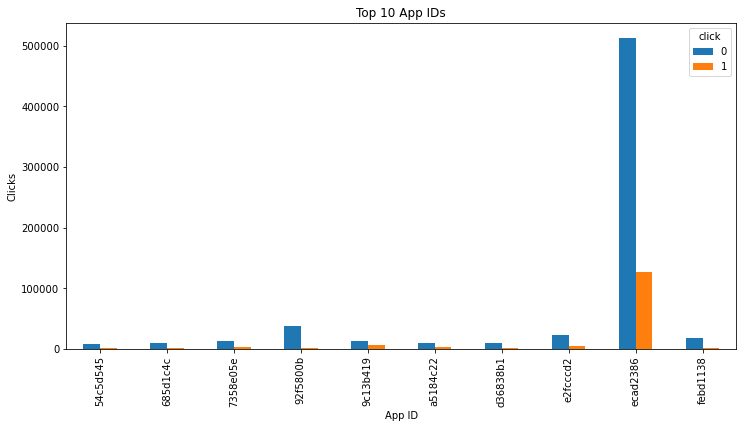

In [72]:
top10_device = train[(train.app_id.isin((train.app_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['app_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 App IDs');
plt.ylabel('Clicks')
plt.xlabel('App ID')

Based on this figure, we see that value ecad2386 had the largest amount of impressions as well as clicks. Next, we can view the CTR by App ID.

In [73]:
top10_devices = (train.app_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.app_id== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for app ID value: {},  click through rate: {}".format(i,click_avg))

for app ID value: ecad2386,  click through rate: 0.1983117807661918
for app ID value: 92f5800b,  click through rate: 0.019224733207784055
for app ID value: e2fcccd2,  click through rate: 0.19717501971750198
for app ID value: febd1138,  click through rate: 0.04776071827020135
for app ID value: 9c13b419,  click through rate: 0.30571443844550167
for app ID value: 7358e05e,  click through rate: 0.1856319172907416
for app ID value: a5184c22,  click through rate: 0.25575090371344067
for app ID value: d36838b1,  click through rate: 0.06882953934396846
for app ID value: 685d1c4c,  click through rate: 0.0767056530214425
for app ID value: 54c5d545,  click through rate: 0.12274478005270627


We can also visualize the CTR by App ID.

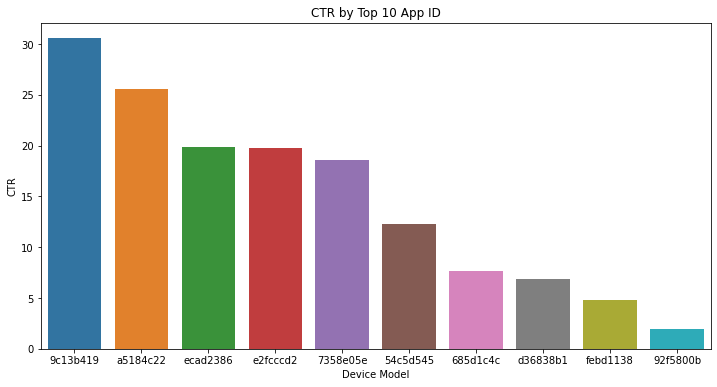

In [74]:
df_category = top10_device[['app_id','click']].groupby(['app_id']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['app_id','click']].groupby(['app_id']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['app_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='app_id', data=df_category, order=sort_category)
plt.xlabel('Device Model')
plt.title('CTR by Top 10 App ID');

Based on this figure, we can see that App ID 9c13b419 had the highest CTR. This is in contrast to the App ID we saw earlier with the largest number of clicks. Thus, companies should potentially emphasize this particular App ID more in the future. Next, we can also measure the number of unqiue App Domain values there are in the dataset.

In [75]:
train.app_domain.nunique()

206

Next, we can measure how many impressions there are for each App Domain value.

In [76]:
print('The impressions by App Domain')
print((train.app_domain.value_counts()/len(train)))

The impressions by App Domain
7801e8d9    0.673558
2347f47a    0.130311
ae637522    0.046339
5c5a694b    0.027896
82e27996    0.018824
              ...   
e193e1f5    0.000001
6bfb9168    0.000001
438468ad    0.000001
6a90b0cb    0.000001
449e219f    0.000001
Name: app_domain, Length: 206, dtype: float64


We can also visualize the number of clicks there are vs total impressions by App Domain in the dataset,

Text(0.5, 0, 'App Domain')

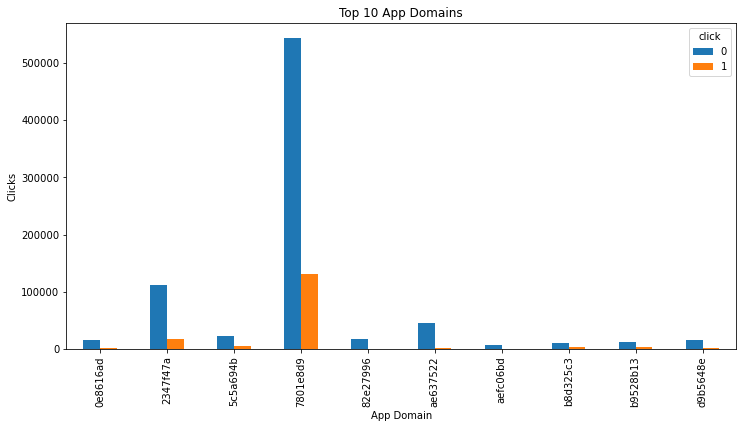

In [77]:
top10_device = train[(train.app_domain.isin((train.app_domain.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['app_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 App Domains');
plt.ylabel('Clicks')
plt.xlabel('App Domain')

We see that App Domain 7801e8d9 had the highest number of clicks and overall impressions. We can then find the CTR for the various App Domains in the dataset.

In [78]:
top10_devices = (train.app_domain.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.app_domain== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for App Domain value: {},  click through rate: {}".format(i,click_avg))

for App Domain value: 7801e8d9,  click through rate: 0.19466029651492522
for App Domain value: 2347f47a,  click through rate: 0.13755554020765706
for App Domain value: ae637522,  click through rate: 0.02406180539070761
for App Domain value: 5c5a694b,  click through rate: 0.1971608832807571
for App Domain value: 82e27996,  click through rate: 0.047758181045473865
for App Domain value: d9b5648e,  click through rate: 0.11445919872886165
for App Domain value: 0e8616ad,  click through rate: 0.06765380087974723
for App Domain value: b9528b13,  click through rate: 0.17904617904617903
for App Domain value: b8d325c3,  click through rate: 0.23834586466165414
for App Domain value: aefc06bd,  click through rate: 0.0688582251082251


We can also visualize the CTR for the App Domains.

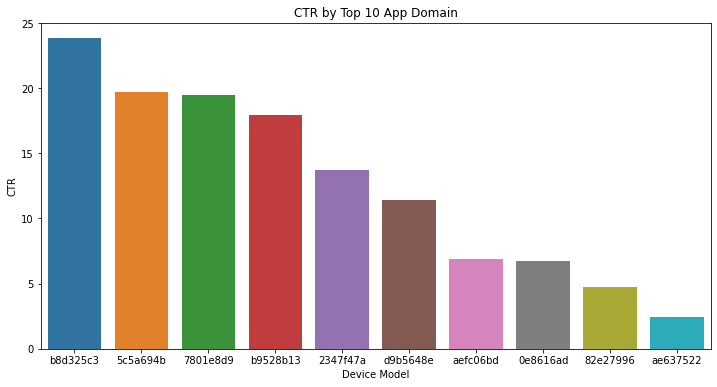

In [79]:
df_category = top10_device[['app_domain','click']].groupby(['app_domain']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['app_domain','click']].groupby(['app_domain']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['app_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='app_domain', data=df_category, order=sort_category)
plt.xlabel('Device Model')
plt.title('CTR by Top 10 App Domain');

In contrary to the App Domain with the highest number of clicks, we see that App Domain b8d325c3 has the highest CTR. Thus, companies should emphasize this App Domain moving forward. We can also examine the dataset by App Category.

In [80]:
train.app_category.nunique()

27

We also measure how many impressions there are for each app category in the dataset.

In [81]:
print('The impressions by app categories')
print((train.app_category.value_counts()/len(train)))

The impressions by app categories
07d7df22    0.647099
0f2161f8    0.236280
cef3e649    0.042629
8ded1f7a    0.036493
f95efa07    0.028447
d1327cf5    0.003131
09481d60    0.001398
dc97ec06    0.001358
75d80bbe    0.000959
4ce2e9fc    0.000554
fc6fa53d    0.000517
879c24eb    0.000309
a3c42688    0.000281
4681bb9d    0.000155
0f9a328c    0.000145
a86a3e89    0.000068
2281a340    0.000060
8df2e842    0.000050
0bfbc358    0.000016
79f0b860    0.000016
a7fd01ec    0.000012
5326cf99    0.000009
7113d72a    0.000004
2fc4f2aa    0.000004
18b1e0be    0.000003
0d82db25    0.000002
bd41f328    0.000001
Name: app_category, dtype: float64


We can also plot the number of clicks versus total impressions by App Category.

Text(0.5, 0, 'App Category')

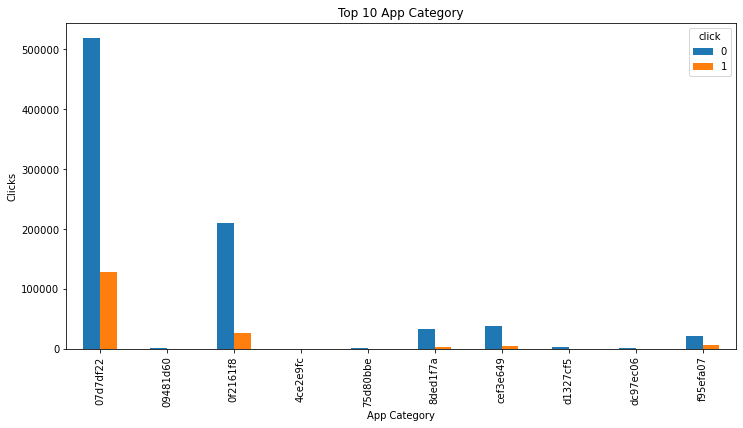

In [82]:
top10_device = train[(train.app_category.isin((train.app_category.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['app_category', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 App Category');
plt.ylabel('Clicks')
plt.xlabel('App Category')

We see that App Category 07d7df22 and 0f2161f8 had the highest number of impressions and clicks. Next, we can also view the CTR by App Category.

In [83]:
top10_devices = (train.app_category.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.app_category== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for App Category value: {},  click through rate: {}".format(i,click_avg))

for App Category value: 07d7df22,  click through rate: 0.19890155911228422
for App Category value: 0f2161f8,  click through rate: 0.10872693414592856
for App Category value: cef3e649,  click through rate: 0.09280067559642496
for App Category value: 8ded1f7a,  click through rate: 0.08924999314937111
for App Category value: f95efa07,  click through rate: 0.2461067950926284
for App Category value: d1327cf5,  click through rate: 0.12200574896199297
for App Category value: 09481d60,  click through rate: 0.15951359084406294
for App Category value: dc97ec06,  click through rate: 0.14653902798232696
for App Category value: 75d80bbe,  click through rate: 0.08133472367049009
for App Category value: 4ce2e9fc,  click through rate: 0.11191335740072202


We can also visualize the CTR.

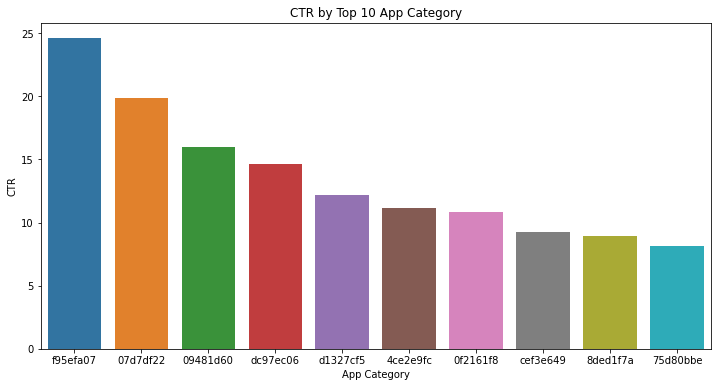

In [84]:
df_category = top10_device[['app_category','click']].groupby(['app_category']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['app_category','click']].groupby(['app_category']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['app_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='app_category', data=df_category, order=sort_category)
plt.xlabel('App Category')
plt.title('CTR by Top 10 App Category');

Based on this graph, we see that App Category f95efa07 had the highest CTR. Thus, companies should potentially emphasize this App Category more moving forward. Next, we can study the other C category variables in the dataset.

In [85]:
train.C14.nunique()

2252

Beginning with C14, we can look a the values with the highest percentage of impressions.

In [86]:
print('The impressions by C14 values')
print((train.C14.value_counts()/len(train)))

The impressions by C14 values
4687     0.023422
21611    0.022478
21191    0.018876
21189    0.018718
19771    0.018162
           ...   
21190    0.000001
23102    0.000001
21136    0.000001
21718    0.000001
23188    0.000001
Name: C14, Length: 2252, dtype: float64


We can also plot a graph of clicks vs total impressions by C14 value.

Text(0.5, 0, 'C14')

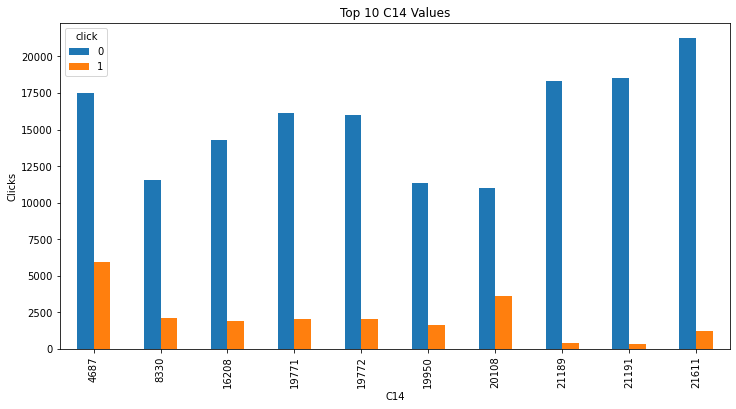

In [87]:
top10_device = train[(train.C14.isin((train.C14.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C14', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C14 Values');
plt.ylabel('Clicks')
plt.xlabel('C14')

We see that C14 value 21611 had the largest number of impressions, but value 4687 had the largest number of clicks. Next, we can find the CTR of the different C14 values.

In [88]:
top10_devices = (train.C14.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C14== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C14 value: {},  click through rate: {}".format(i,click_avg))

for C14 value: 4687,  click through rate: 0.25296729570489285
for C14 value: 21611,  click through rate: 0.055120562327609215
for C14 value: 21191,  click through rate: 0.019442678533587623
for C14 value: 21189,  click through rate: 0.020034191687146062
for C14 value: 19771,  click through rate: 0.11320339169694968
for C14 value: 19772,  click through rate: 0.11414337115970108
for C14 value: 16208,  click through rate: 0.11673464343097269
for C14 value: 20108,  click through rate: 0.2481547293603062
for C14 value: 8330,  click through rate: 0.15468282356376378
for C14 value: 19950,  click through rate: 0.12761714855433698


We can also visualize the CTR of the C14 values.

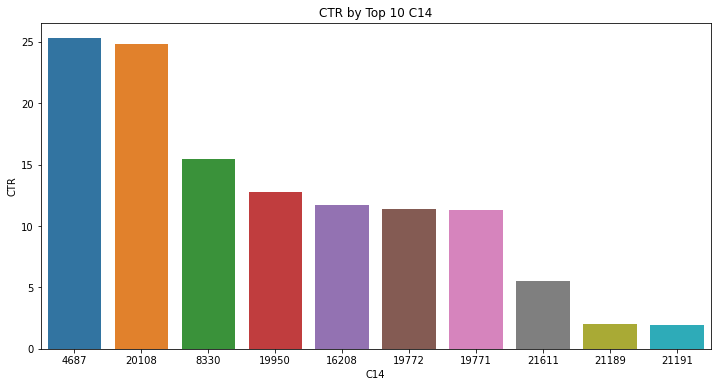

In [89]:
df_category = top10_device[['C14','click']].groupby(['C14']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C14','click']].groupby(['C14']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C14'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C14', data=df_category, order=sort_category)
plt.xlabel('C14')
plt.title('CTR by Top 10 C14');

Based on this graph, we see that value 20108 had the highest CTR. This is in contrast to the values we saw previously with the highest number of clicks and impressions. Thus, emphasizing this C14 value more could be beneficial for companies. Next, we can plot the number of unique C15 values as well as the C15 values with the highest percentage of impressions. This can be seen below.

In [90]:
train.C15.nunique()

8

In [91]:
print('The impressions by C15 values')
print((train.C15.value_counts()/len(train)))

The impressions by C15 values
320     0.932683
300     0.057904
216     0.007362
728     0.001823
1024    0.000065
120     0.000065
480     0.000054
768     0.000044
Name: C15, dtype: float64


We can also plot a histogram of the number of clicks versus total impressions by C15 value.

Text(0.5, 0, 'C15')

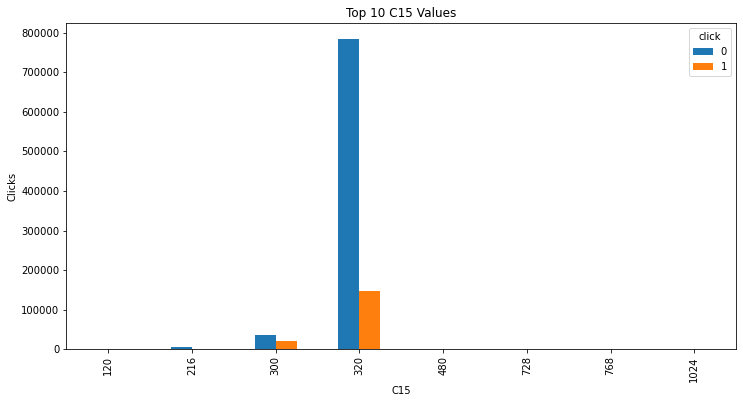

In [92]:
top10_device = train[(train.C15.isin((train.C15.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C15', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C15 Values');
plt.ylabel('Clicks')
plt.xlabel('C15')

Based on this graph, we see that C15 value 320 had the highest number of clicks and total impressions. We can also find the CTR of these different values.

In [93]:
top10_devices = (train.C15.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C15== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C15 value: {},  click through rate: {}".format(i,click_avg))

for C15 value: 320,  click through rate: 0.15845040597930915
for C15 value: 300,  click through rate: 0.3596988118264714
for C15 value: 216,  click through rate: 0.1284976908448791
for C15 value: 728,  click through rate: 0.05650027427317608
for C15 value: 1024,  click through rate: 0.15384615384615385
for C15 value: 120,  click through rate: 0.06153846153846154
for C15 value: 480,  click through rate: 0.2037037037037037
for C15 value: 768,  click through rate: 0.5


We can then plot a graph of these CTR values.

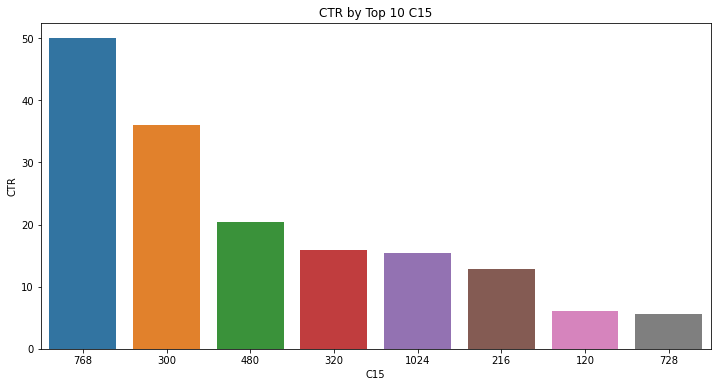

In [94]:
df_category = top10_device[['C15','click']].groupby(['C15']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C15','click']].groupby(['C15']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C15'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C15', data=df_category, order=sort_category)
plt.xlabel('C15')
plt.title('CTR by Top 10 C15');

Based on this graph, we see that although value 320 had the highest number of clicks and impressions, value 120 by far has the highest CTR. Thus, emphasizing this value more could be beneficial for companies moving forward. Next, we can plot the number of unique C16 values there are.

In [95]:
train.C16.nunique()

9

We can also plot the number of impressions there are for each C16 value.

In [96]:
print('The impressions by C16 values')
print((train.C16.value_counts()/len(train)))

The impressions by C16 values
50      0.943054
250     0.044886
36      0.007362
480     0.002647
90      0.001823
768     0.000065
20      0.000065
320     0.000054
1024    0.000044
Name: C16, dtype: float64


We can also plot a graph of the number of clicks vs total impressions by  C16 value.

Text(0.5, 0, 'C16')

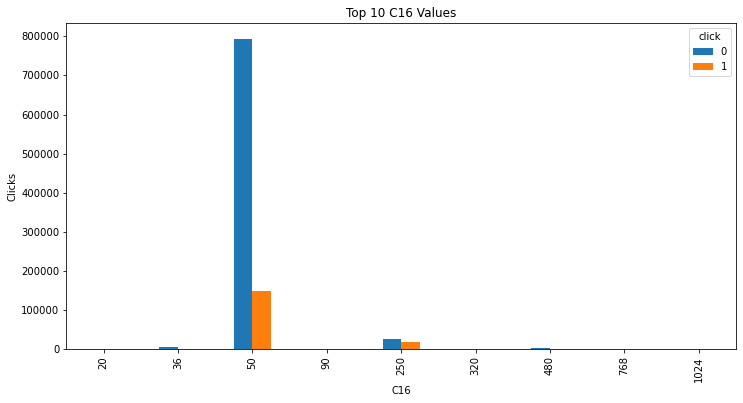

In [97]:
top10_device = train[(train.C16.isin((train.C16.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C16', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C16 Values');
plt.ylabel('Clicks')
plt.xlabel('C16')

Based on this graph, we see that C16 value 50 had the highest number of clicks and impressions. Next, lets plot the CTR for these values.

In [98]:
top10_devices = (train.C16.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C16== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C16 value: {},  click through rate: {}".format(i,click_avg))

for C16 value: 50,  click through rate: 0.15814682934381277
for C16 value: 250,  click through rate: 0.42068796506705874
for C16 value: 36,  click through rate: 0.1284976908448791
for C16 value: 480,  click through rate: 0.22213826973932754
for C16 value: 90,  click through rate: 0.05650027427317608
for C16 value: 768,  click through rate: 0.15384615384615385
for C16 value: 20,  click through rate: 0.06153846153846154
for C16 value: 320,  click through rate: 0.2037037037037037
for C16 value: 1024,  click through rate: 0.5


We can also visualize the CTR for the different C16 values.

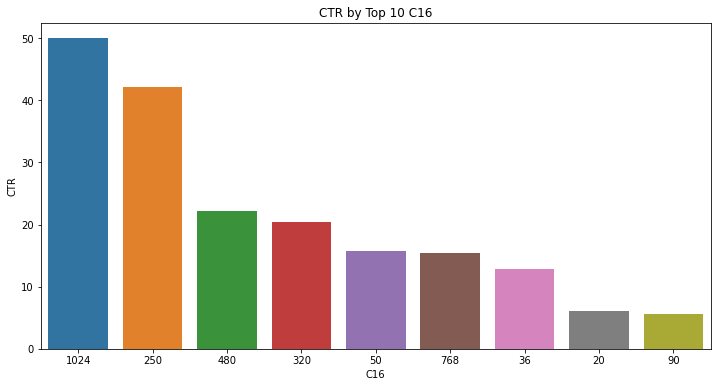

In [99]:
df_category = top10_device[['C16','click']].groupby(['C16']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C16','click']].groupby(['C16']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C16'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C16', data=df_category, order=sort_category)
plt.xlabel('C16')
plt.title('CTR by Top 10 C16');

Based on this graph, we see that C16 value 1024 had the highest CTR. This is contrast to the value we saw previously that had the highest number of impressions and clicks. Thus, companies should potentially emphasize this value more moving forward. Next, we can also plot the number of unique C17 values there are in the dataset.

In [100]:
train.C17.nunique()

420

We can also measure the number of impressions there are for each C17 value.

In [101]:
print('The impressions by C17 values')
print((train.C17.value_counts()/len(train)))

The impressions by C17 values
1722    0.111797
2424    0.037595
2227    0.036544
1800    0.029313
423     0.023422
          ...   
2651    0.000002
644     0.000001
2718    0.000001
2575    0.000001
2737    0.000001
Name: C17, Length: 420, dtype: float64


We can also plot the number of clicks versus impressions by C17 value.

Text(0.5, 0, 'C17')

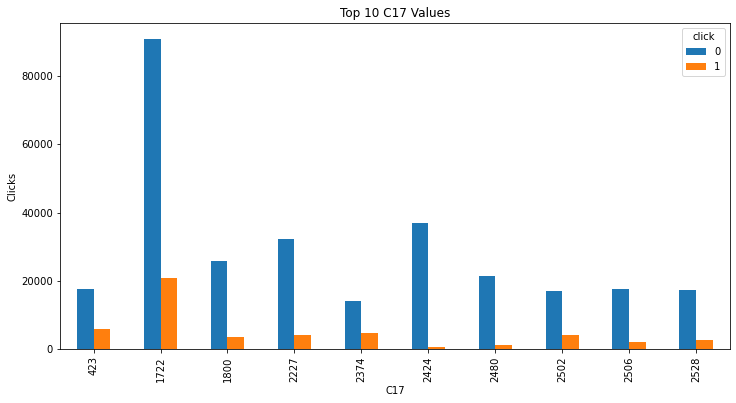

In [102]:
top10_device = train[(train.C17.isin((train.C17.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C17', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C17 Values');
plt.ylabel('Clicks')
plt.xlabel('C17')

Based on this graph, we see that value 1722 has the highest number of clicks and impressions. Next, we can visualize the CTR for each of these different values.

In [103]:
top10_devices = (train.C17.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C17== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C17 value: {},  click through rate: {}".format(i,click_avg))

for C17 value: 1722,  click through rate: 0.18728588423660741
for C17 value: 2424,  click through rate: 0.019736667109988032
for C17 value: 2227,  click through rate: 0.11367119089316988
for C17 value: 1800,  click through rate: 0.12151605089891857
for C17 value: 423,  click through rate: 0.25296729570489285
for C17 value: 2480,  click through rate: 0.0552626954840977
for C17 value: 2502,  click through rate: 0.194606379449263
for C17 value: 2528,  click through rate: 0.1341481591891489
for C17 value: 2506,  click through rate: 0.10293225480283114
for C17 value: 2374,  click through rate: 0.24842250384431835


We can also visualize the CTR using a graph.

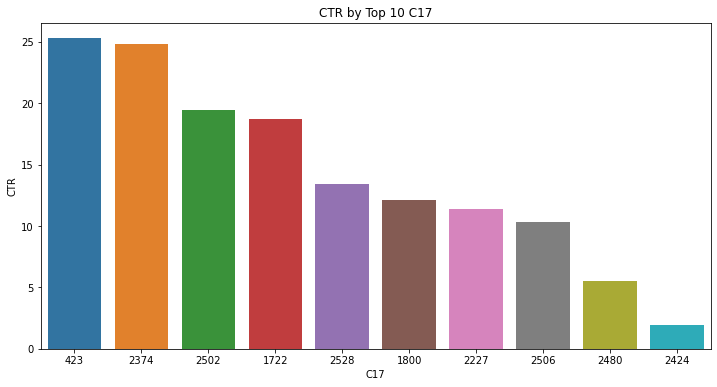

In [104]:
df_category = top10_device[['C17','click']].groupby(['C17']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C17','click']].groupby(['C17']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C17'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C17', data=df_category, order=sort_category)
plt.xlabel('C17')
plt.title('CTR by Top 10 C17');

Based on this graph, we see that C17 value 2374 had the highest CTR. On the other hand, the value with the highest number of impressions and clicks, 1722, only had the third highest CTR. Thus, emphasizing value 2374 could be beneficial for companies moving foward. Next, we can view the number of unique C18 values there are.

In [105]:
train.C18.nunique()

4

 We can also plot the C18 values with the highest percentage of total impressions.

In [106]:
print('The impressions by C18 values')
print((train.C18.value_counts()/len(train)))

The impressions by C18 values
0    0.419316
3    0.338053
2    0.175858
1    0.066773
Name: C18, dtype: float64


We can then visualize the number of clicks versus total impressions versus C18 value.

Text(0.5, 0, 'C18')

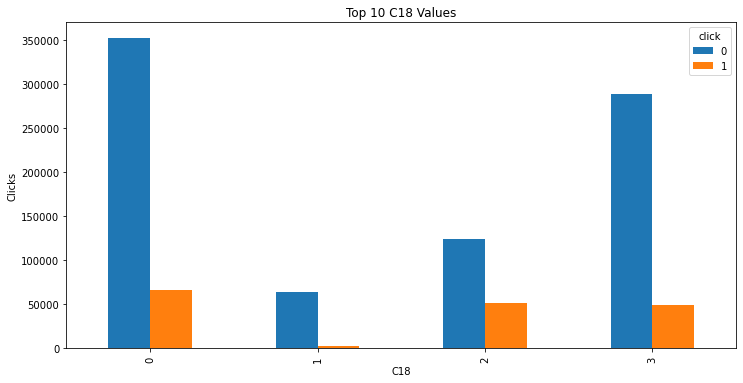

In [107]:
top10_device = train[(train.C18.isin((train.C18.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C18', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C18 Values');
plt.ylabel('Clicks')
plt.xlabel('C18')

We see that values 0 and 3 have the highest number of clicks and overall impressions.We can then measure the CTR of these different values.

In [108]:
top10_devices = (train.C18.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C18== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C18 value: {},  click through rate: {}".format(i,click_avg))

for C18 value: 0,  click through rate: 0.15829827624035334
for C18 value: 3,  click through rate: 0.14508671717156776
for C18 value: 2,  click through rate: 0.2961650877412458
for C18 value: 1,  click through rate: 0.032962424932233086


We can also visualize these CTR values.

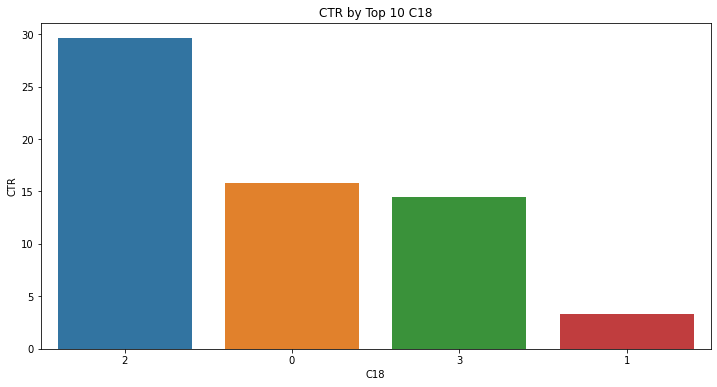

In [109]:
df_category = top10_device[['C18','click']].groupby(['C18']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C18','click']].groupby(['C18']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C18'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C18', data=df_category, order=sort_category)
plt.xlabel('C18')
plt.title('CTR by Top 10 C18');

We see that value 2 has the highest CTR, whereas values 0 and 3 have the second and third highest CTR respectively. Thus, placing more emphasize on this C18 value could be beneficial. Moving on to C19, we can plot the number of unique values there are in the dataset. 

In [110]:
train.C19.nunique()

67

We can also plot the values with the highest percentage of impressions in this category.

In [111]:
print('The impressions by C19 values')
print((train.C19.value_counts()/len(train)))

The impressions by C19 values
35      0.301198
39      0.218909
167     0.077370
161     0.038958
47      0.035751
          ...   
683     0.000019
1447    0.000003
545     0.000002
1195    0.000002
677     0.000001
Name: C19, Length: 67, dtype: float64


We can then plot the number of clicks versus total impressions by C19 value.

Text(0.5, 0, 'C19')

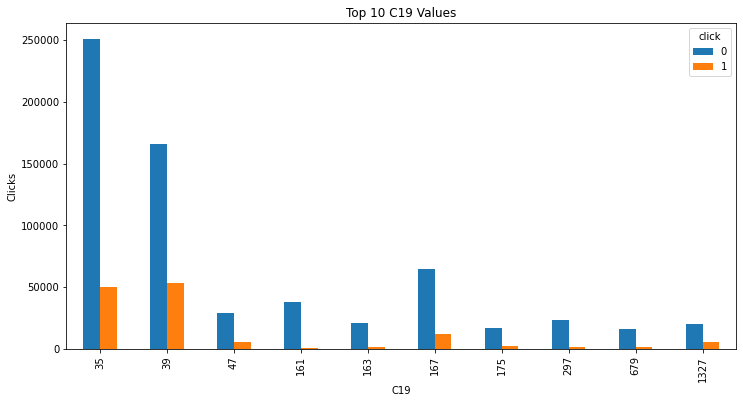

In [112]:
top10_device = train[(train.C19.isin((train.C19.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C19', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C19 Values');
plt.ylabel('Clicks')
plt.xlabel('C19')

Based on this graph, we see that values 35 and 39 had the highest number of clicks and overall impresssions. We can then plot the CTR for the different C19 values.

In [113]:
top10_devices = (train.C19.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C19== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C19 value: {},  click through rate: {}".format(i,click_avg))

for C19 value: 35,  click through rate: 0.16704626192737004
for C19 value: 39,  click through rate: 0.24384104810674756
for C19 value: 167,  click through rate: 0.1598940157683857
for C19 value: 161,  click through rate: 0.02266543457056317
for C19 value: 47,  click through rate: 0.17428883108164805
for C19 value: 1327,  click through rate: 0.23227048846424472
for C19 value: 297,  click through rate: 0.07352238330412618
for C19 value: 163,  click through rate: 0.09268398268398269
for C19 value: 175,  click through rate: 0.12834704562453253
for C19 value: 679,  click through rate: 0.11533849340455685


We can also graph the CTRs for the different C19 values.

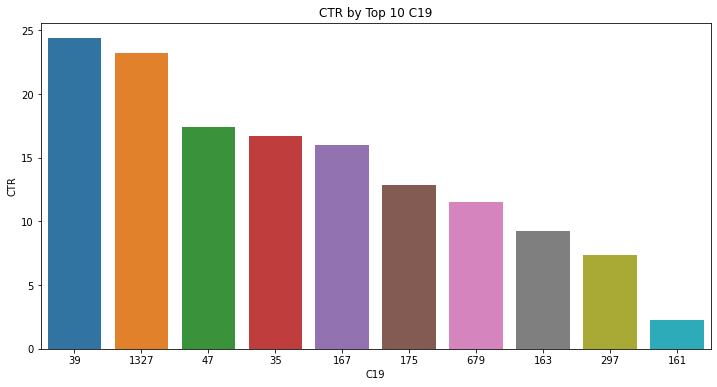

In [114]:
df_category = top10_device[['C19','click']].groupby(['C19']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C19','click']].groupby(['C19']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C19'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C19', data=df_category, order=sort_category)
plt.xlabel('C19')
plt.title('CTR by Top 10 C19');

Based on this graph, we see that values 39 and 1327 had the highest CTR. While we saw value 39 on the previous graph for the values with the most impressions and clicks, 1327 was not one of the values with the highest amount of impressions or clicks. Thus, emphasizing this value could be beneficial for companies moving forward.Next, we can plot the C20 values witht he highest percentage of ad impressions.Next, we can measure the number of unique C20 values there are in the dataset.

In [115]:
train.C20.nunique()

165

We can also measure the total number of impressions there are by percentage for each C20 value.This can be seen below.

In [116]:
print('The impressions by C20 values')
print((train.C20.value_counts()/len(train)))

The impressions by C20 values
-1         0.468442
 100084    0.060299
 100148    0.044461
 100111    0.042577
 100077    0.039042
             ...   
 100246    0.000001
 100027    0.000001
 100100    0.000001
 100132    0.000001
 100098    0.000001
Name: C20, Length: 165, dtype: float64


We can also graph the number of clicks versus total impressions by C20 values.

Text(0.5, 0, 'C20')

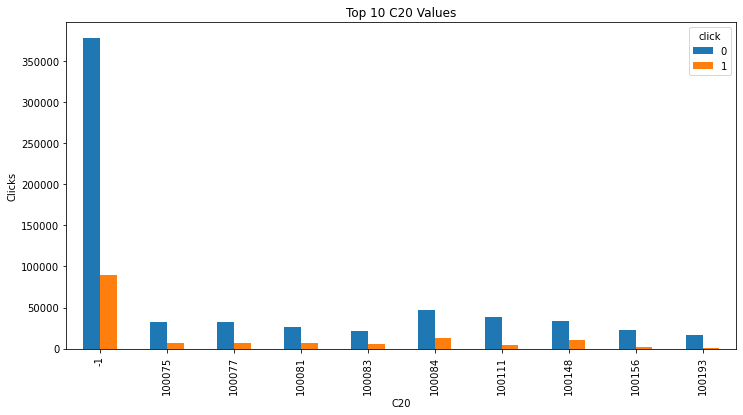

In [117]:
top10_device = train[(train.C20.isin((train.C20.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C20', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C20 Values');
plt.ylabel('Clicks')
plt.xlabel('C20')

Based on this graph, we can see that the value -1 had the highest number of clicks and total impressions. Next, we can plot the C20 values with the highest CTRs.

In [118]:
top10_devices = (train.C20.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C20== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C20 value: {},  click through rate: {}".format(i,click_avg))

for C20 value: -1,  click through rate: 0.1923012880997007
for C20 value: 100084,  click through rate: 0.21423240849765335
for C20 value: 100148,  click through rate: 0.23418276691932255
for C20 value: 100111,  click through rate: 0.08744157643798295
for C20 value: 100077,  click through rate: 0.17588750576302445
for C20 value: 100075,  click through rate: 0.16430136700406972
for C20 value: 100081,  click through rate: 0.19227965741359412
for C20 value: 100083,  click through rate: 0.19354109356747184
for C20 value: 100156,  click through rate: 0.09357371099451654
for C20 value: 100193,  click through rate: 0.022039682998785216


We can then also graph these values.

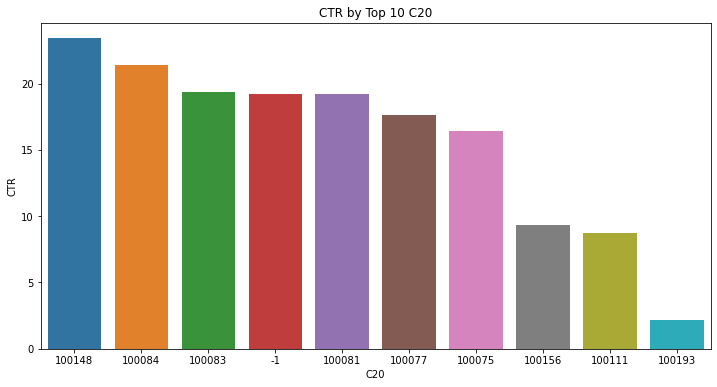

In [119]:
df_category = top10_device[['C20','click']].groupby(['C20']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C20','click']].groupby(['C20']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C20'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C20', data=df_category, order=sort_category)
plt.xlabel('C20')
plt.title('CTR by Top 10 C20');

Based on this graph, we can see that, whereas value -1 had the highest number of clicks and total impressions, values 100148, 1000084 and 100083 had the highest CTR. Thus, emphasizing these values could be beneficial for companies in the future. We can alos measure the number of unique C21 values there are in the dataset.

In [120]:
train.C21.nunique()

60

Next, we can examine the various C21 values by percentage of total impressions.

In [121]:
print('The impressions by C21 values')
print((train.C21.value_counts()/len(train)))

The impressions by C21 values
23     0.220225
221    0.124438
79     0.114263
48     0.053669
71     0.051788
61     0.050794
157    0.045796
32     0.044254
33     0.036960
52     0.029808
42     0.025121
51     0.021191
15     0.018933
212    0.016290
43     0.014504
117    0.010507
229    0.010086
13     0.009581
16     0.008500
156    0.008250
68     0.008112
159    0.007283
95     0.006926
46     0.005911
246    0.005046
17     0.004281
69     0.004248
91     0.004172
76     0.003553
111    0.003515
70     0.003299
90     0.003133
110    0.003097
171    0.002761
204    0.002365
101    0.001989
112    0.001929
253    0.001929
82     0.001749
100    0.001509
182    0.001206
178    0.001141
35     0.001124
108    0.001092
94     0.000526
251    0.000510
116    0.000373
20     0.000349
194    0.000329
93     0.000325
102    0.000222
104    0.000217
126    0.000200
163    0.000145
177    0.000130
255    0.000113
195    0.000105
1      0.000076
219    0.000044
85     0.000008
Name: C21,

Next, we can plot the number of clicks versus total impressions by C21 values.

Text(0.5, 0, 'C21')

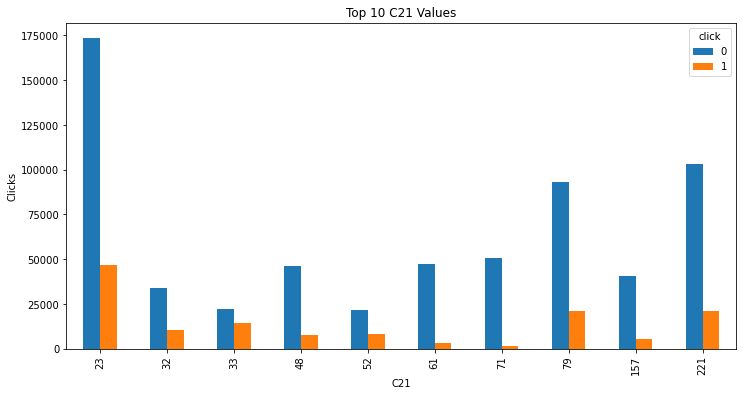

In [122]:
top10_device = train[(train.C21.isin((train.C21.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C21', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C21 Values');
plt.ylabel('Clicks')
plt.xlabel('C21')

Based on this graph, we see that values 23 and 221 had the highest number of clicks and total impressions. Moving on, we can also calculate the CTR by the different C21 values.

In [123]:
top10_devices = (train.C21.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C21== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C21 value: {},  click through rate: {}".format(i,click_avg))

for C21 value: 23,  click through rate: 0.2119604949483483
for C21 value: 221,  click through rate: 0.16879088381362606
for C21 value: 79,  click through rate: 0.1853180819687913
for C21 value: 48,  click through rate: 0.14119882986454005
for C21 value: 71,  click through rate: 0.02714914652042944
for C21 value: 61,  click through rate: 0.06469268023782336
for C21 value: 157,  click through rate: 0.11623285876495763
for C21 value: 32,  click through rate: 0.23073620463686897
for C21 value: 33,  click through rate: 0.3951839826839827
for C21 value: 52,  click through rate: 0.2723429951690821


We can also generate a graph to visualize the CTR.

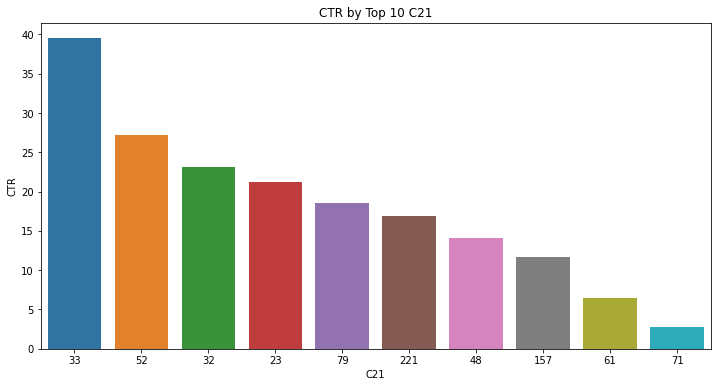

In [124]:
df_category = top10_device[['C21','click']].groupby(['C21']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C21','click']].groupby(['C21']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C21'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C21', data=df_category, order=sort_category)
plt.xlabel('C21')
plt.title('CTR by Top 10 C21');

Based on this graph, we can see that values 33 and 52 had the highest CTR. This in contrast to the values we saw previously with the highest number of add impressions. Thus, emphasizing these values more could be beneficial for companies moving forward. Next, now that we have completed our Explaratory Data Analysis, we can move on to the Feature Engineering session of the analysis.

# Feature Engineering

Based on the EDA, we can see which features are the most important for our analysis, as well as the changes we need to make to our dataset before we employ our machine learning model.  As mentioned previously, because this machine learning problem is a classification problem, there are several different model types that may be the most effective. These models include Logistic Regression, Naïve Bayes and Decision Tree. Each of these different machine learning mechanisms will be explored throughout the course of this paper. However, in using these different machine learning algorithms, several changes had to be made to the data in order to prepare them for the analysis. To begin with we drop the hour label as well as the label id. We drop hour because it has already been converted into two other variables, day_of_week and hour_of_day. We drop id because it has no significant as it simply represents each individual user id for the observations in the dataset. We also drop device ip. Next, we need to change the datatypes of some of the variables in order to allow the machine learning model to work. Specifically, we change all of the values to integers. In order to do this, we use a label encoder to change the variables datatypes to integers for those that were previously considered objects. We also need to add some variables to the test dataset so the number of features is the same, as well as apply the data transformation to the test dataset as well. All of these changes can be seen below.

In [125]:
train.drop('id', axis=1, inplace=True)
train.drop('device_ip', axis=1, inplace=True)
train.drop('hour', axis=1, inplace=True)
train.drop('my_dates', axis=1, inplace=True)

In [126]:
test['hour_of_day'] = test.hour.apply(lambda x: x.hour)
test['my_dates'] = pd.to_datetime(test['hour'])
test['day_of_week'] = test['my_dates'].dt.day_name()

In [127]:
test.drop('hour', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
test.drop('my_dates', axis=1, inplace=True)
test.drop('device_ip', axis=1, inplace=True)

In [128]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in test.columns:
    if test[column_name].dtype == object:
        test[column_name] = le.fit_transform(test[column_name])
    else:
        pass

In [129]:
le = preprocessing.LabelEncoder()
for column_name in train.columns:
    if train[column_name].dtype == object:
        train[column_name] = le.fit_transform(train[column_name])
    else:
        pass

In [130]:
test.dtypes

C1                  int64
banner_pos          int64
site_id             int64
site_domain         int64
site_category       int64
app_id              int64
app_domain          int64
app_category        int64
device_id           int64
device_model        int64
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
hour_of_day         int64
day_of_week         int64
dtype: object

In [131]:
train.dtypes

click               int64
C1                  int64
banner_pos          int64
site_id             int64
site_domain         int64
site_category       int64
app_id              int64
app_domain          int64
app_category        int64
device_id           int64
device_model        int64
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
hour_of_day         int64
day_of_week         int64
dtype: object

In [132]:
Y = train.click.values

As part of the next step, in order to help make our machine learning algorithms run smoother, scaling the data is very important. Specifically, we scale all of the variables on a range from 0 to 1. This ensures that the data will be easily readable by the machine learning model and will ensure the training and testing process goes smoothly. Thus, we apply a scaler to both the training and data sets.

In [133]:
fs = list(train.columns)
if 'click' in fs:
  fs.remove('click')
scaler = StandardScaler()
train[fs] = scaler.fit_transform(train[fs])
train.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,1,0.028553,-0.564899,-1.458093,1.207668,-1.069564,0.51481,0.160953,-0.503948,0.209505,...,-0.631649,0.052741,-0.214072,-0.641107,-1.079837,-0.547171,0.938165,-0.060883,-1.892439,0.604101
1,0,0.028553,-0.564899,-1.884767,-2.662483,0.246965,0.51481,0.160953,-0.503948,0.209505,...,0.030503,0.052741,-0.214072,0.079266,-1.079837,-0.547171,-1.065240,1.049722,-1.892439,0.604101
2,0,0.028553,-0.564899,0.536647,0.837584,1.417214,0.51481,0.160953,-0.503948,0.209505,...,0.353617,0.052741,-0.214072,0.079266,-1.079837,-0.547171,-1.065240,1.049722,-1.892439,0.604101
3,0,0.028553,-0.564899,-1.458093,1.207668,-1.069564,0.51481,0.160953,-0.503948,0.209505,...,-0.631850,0.052741,-0.214072,-0.641107,-1.079837,-0.547171,-1.065240,-0.060883,-1.892439,0.604101
4,1,0.028553,-0.564899,1.426964,0.296692,1.417214,0.51481,0.160953,-0.503948,0.209505,...,-0.387348,0.052741,-0.214072,-0.350661,-1.079837,0.581391,-1.065240,0.480181,-1.892439,0.604101


In [134]:
fs = list(test.columns)
if 'click' in fs:
  fs.remove('click')
scaler = StandardScaler()
test[fs] = scaler.fit_transform(test[fs])
test.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_model,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,0.007917,-0.445584,0.394782,0.227225,-0.638521,-2.557948,-1.599657,-0.100865,0.183384,-0.354216,...,-0.417371,-0.005283,-0.206945,-0.344385,1.301885,-0.085950,0.931974,-0.367961,-2.032803,0.0
1,0.007917,1.650285,1.756008,-0.977999,1.180145,0.548992,0.193378,-0.551046,0.183384,-0.342309,...,0.533714,-0.005283,-0.206945,0.519077,1.301885,-0.527845,-1.070692,-0.821149,-2.032803,0.0
2,0.007917,-0.445584,1.400905,-0.613629,-1.002254,0.548992,0.193378,-0.551046,0.183384,-0.218470,...,0.533448,-0.005283,-0.206945,0.519077,1.301885,-0.527845,0.935338,-0.821149,-2.032803,0.0
3,0.007917,-0.445584,0.394782,0.227225,-0.638521,-2.557948,-1.599657,-0.100865,-0.376661,1.449787,...,-0.258058,-0.005283,-0.206945,-1.214179,-0.998276,1.887341,0.932134,0.109078,-2.032803,0.0
4,0.007917,-0.445584,0.394782,0.227225,-0.638521,-1.545662,-1.599657,1.549798,0.350092,0.429305,...,-0.728006,-0.005283,-0.206945,-0.658946,1.301885,0.401659,0.935378,-0.367961,-2.032803,0.0


Once these changes are complete, we are ready to implement our machine learning model.

# Machine Learning Model

To begin with, we will use a logistic regression machine learning model. Logistic regression models are excellent for binary classification problems, such as the one we are employing in this study.

# Logistic Regression

Initially, in order to run our logistic regression model, we need to isolate the output variable and the features in the training dataset.

In [135]:
X = train.loc[:, train.columns != 'click']

Then, we can add our logistic regression model.

In [136]:
clf_LR = LogisticRegression(penalty='none', fit_intercept=True, max_iter=10000, verbose = 2, class_weight = 'balanced')

We then fit our model.

In [137]:
clf_LR.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D+05    |proj g|=  8.66025D+04

At iterate    1    f=  6.69969D+05    |proj g|=  2.23731D+04

At iterate    2    f=  6.66444D+05    |proj g|=  1.17279D+04

At iterate    3    f=  6.64956D+05    |proj g|=  8.08156D+03

At iterate    4    f=  6.64223D+05    |proj g|=  4.86104D+03

At iterate    5    f=  6.64117D+05    |proj g|=  4.56998D+03

At iterate    6    f=  6.64013D+05    |proj g|=  1.64941D+03

At iterate    7    f=  6.63992D+05    |proj g|=  1.64846D+03

At iterate    8    f=  6.63951D+05    |proj g|=  1.55931D+03

At iterate    9    f=  6.63896D+05    |proj g|=  1.56563D+03

At iterate   10    f=  6.63798D+05    |proj g|=  2.38171D+03

At iterate   11    f=  6.63748D+05    |proj g|=  1.97480D+03

At iterate   12    f=  6.63710D+05    |proj g|=  1.21375D+03

At iterate   13    f=  6.6

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(class_weight='balanced', max_iter=10000, penalty='none',
                   verbose=2)

At iterate   23    f=  6.63643D+05    |proj g|=  1.99419D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   23     23     27      1     0     0   1.994D+00   6.636D+05
  F =   663643.18381890561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


We then run our model on the test set.

In [138]:
log_reg_pred = clf_LR.predict(test)

In [139]:
test.shape

(113593, 22)

In [140]:
log_reg_pred = np.random.choice(log_reg_pred, size=(1000000))

Once the machine learning model has been run, we can work towards optimizing it. In terms of optimizing a machine learning model, there are a variety of different metrics which can be of assistance. These metrics include precision, recall, f1 score and accuracy. In defining these different metrics, we see that precision equals the number of true positive divided by the total number of positives in the model. Thus it generally indicates the quality of positive predictions made by the mode. On the other hand, recall, refers to the ratio between the number of positive samples correctly classified to the total number of positive samples. Thus, the recall measures the model's ability to detect positive samples. Next, the f1 score is also important.Specifically, it takes combines both precision and recall by taking their harmonic mean. This is typically used to compare the performance of two different classifiers. Lastly, accuracy measures the number of correctly predicted data points out of all the datapoints. Next, we will print a classification report to view all of these different metrics. In evaluating the effectiveness of machine learning models and analyzing these different metrics, we also need to understand prediction errors associated with variance and bias. In machine learning, bias is defined as the difference between the average prediction of the model and the correct value we are attempting to predict. On the other hand variance is defined as the variability of the model for a given data point. We need to keep in mind both of these concepts when evaluating our models. In machine learning, we also need to be aware of the possibily of underfitting and overfitting. Underfitting is defined as when the model is unable to capture the underlying pattern of the data. Overffitting is defined as when the model captures too much noise along with the pattern of the data. There is a tradeoff between these different concepts, increasing bias can reduce variance and vice versa. The key is finding a good balance of both concepts to heighten the performance of the model.

In [141]:
print(classification_report(Y, log_reg_pred))

              precision    recall  f1-score   support

           0       0.83      0.54      0.65    830292
           1       0.17      0.46      0.25    169708

    accuracy                           0.52   1000000
   macro avg       0.50      0.50      0.45   1000000
weighted avg       0.72      0.52      0.58   1000000



There is also something in machine learning called the roc auc score. Similar to the previous metrics, this score is used to calculate the overall quality of the model. Generally, speaking it allows us to to see how good the model is at distinguishing between classes.

In [142]:
print(roc_auc_score(Y, log_reg_pred))

0.4999330293104076


We can also visualize the results of the model using a confusion matrix. This will allow us to see the number of true positives and true negatives, as well as the number of false positives and false negatives there are in the model.

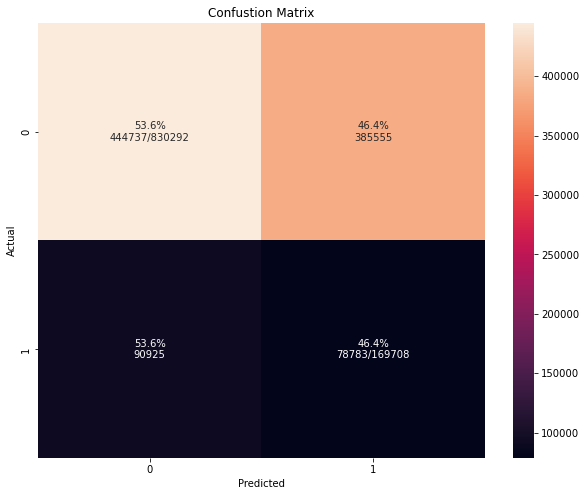

In [143]:

def plot_confusion_matrix(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.title("Confustion Matrix")

plot_confusion_matrix(Y, log_reg_pred, 'filename', [0, 1], ymap=None, figsize=(10,8))

In examing all of these different metrics. We can then work to optimize our machine learning model. Specifically, we can work to optimize the various parameters we input into the model to see which one generates the best results. In the first iteration, the model was very good at predicting 0 values, but not very good at distinguishing when a value of 1 had occured. In order to rectify this, I continued experimenting with different parameters until I could see which one worked best. Because, in this case, we are very concerned with the models ability to distinguish between different classes, the models precision will be a key metric of the models effectiveness. In observing changes in precision, we see that by increasing the number of max iterations, as well as adjusting a few other parameters such as the penalty, as well as whether or not the model is verbose, we could improve this score. In general, we see that this basic model could still be improved, perhaps by trying a more complex version of a logistic regression. It appears the model is overfitted with a high amount of variance. Next, we will examine a Naive Bayes based machine learning model.

# Naive Bayes

In [144]:
nav_bayes_model = GaussianNB()

In [145]:
nav_bayes_model.fit(X, Y)

GaussianNB()

In [146]:
nav_bayes_pred = nav_bayes_model.predict(test)

In [147]:
nav_bayes_pred = np.random.choice(nav_bayes_pred, size=(1000000))

In [148]:
print(classification_report(Y, nav_bayes_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82    830292
           1       0.17      0.19      0.18    169708

    accuracy                           0.71   1000000
   macro avg       0.50      0.50      0.50   1000000
weighted avg       0.72      0.71      0.71   1000000



In [149]:
print(roc_auc_score(Y, nav_bayes_pred))

0.5003266176726194


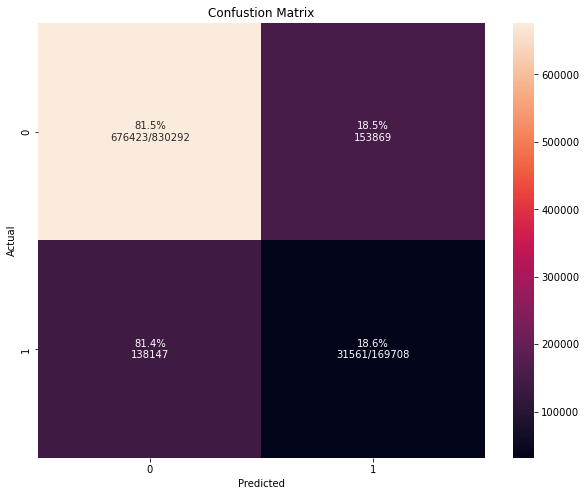

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.title("Confustion Matrix")

plot_confusion_matrix(Y, nav_bayes_pred, 'filename', [0, 1], ymap=None, figsize=(10,8))

In evaluating this model and working towards optimizing it, we can see that it performs similarly to the logistic regression model in a number of ways. Specifically, we see that the precision value is about the same. However, a number of other metrics, including recall, are lower. Based on the confusion matrix, we can also see that this model is not as good at distinguishing between clicks and non-clicks. We can also see that the ROC AUC score is lower.However,  it has a higher accuracy score, indicating it predicted more points overall correctly. We also see that, based on the confusion matrix, the model appears to be underfitted. Unfortunately, in this model, there are not as many parameters we can adjust to try and get a better result. Next, we can also examine the decision tree model.

# Decision Tree

In [151]:
dec_tree_model = DecisionTreeClassifier()

In [152]:
dec_tree_model.fit(X, Y)

DecisionTreeClassifier()

In [153]:
dec_tree_pred = dec_tree_model.predict(test)

In [154]:
dec_tree_pred = np.random.choice(dec_tree_pred, size=(1000000))

In [155]:
print(classification_report(Y, dec_tree_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81    830292
           1       0.17      0.20      0.19    169708

    accuracy                           0.70   1000000
   macro avg       0.50      0.50      0.50   1000000
weighted avg       0.72      0.70      0.71   1000000



In [156]:
print(roc_auc_score(Y, dec_tree_pred))

0.5009943337262693


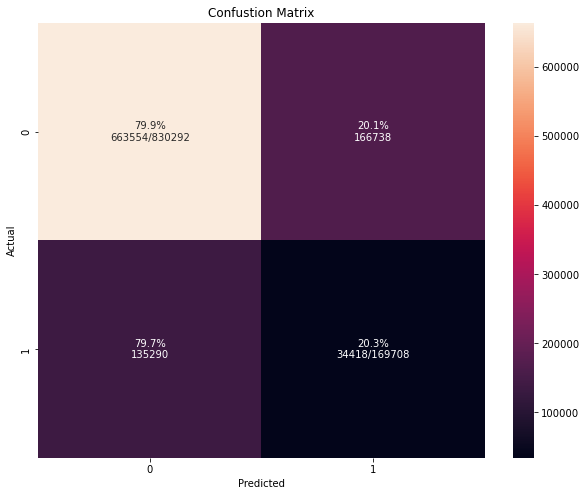

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.title("Confustion Matrix")

plot_confusion_matrix(Y, dec_tree_pred, 'filename', [0, 1], ymap=None, figsize=(10,8))

In analyzing this algorthm, we see that the precision is about the same. We also see that the recall score is lower. We see that this model is also underfitted. Lastly, the accuracy value seems to be pretty high. While it is difficult to compare these models based on the precision score alone because they are the same, we can view the confusion matricies to see which had a higher percentage of clicks classified correctly. Thus, in viewing the results of these various machine learning algorithms, we see that the Decision Tree and Logistic Regression Algorithm works the best. Next, I will try an ensemble decision tree method to see if the results are even better. Ensemble decision trees allow for even more accurate results to be obtained. In machine learning, it is not only the selection of the parameters that matters, but also the selection of the model itself. Certain models work better with certain datasets. Furthermore, certain types of models, for example ensemble models, inherently perform better because they already have numerous models incorporated within. This can improve the performance of the model by implementing the same model numerous times on the same dataset. Thus, in viewing these models we have already implemented, we see that their performance still leaves something to be desired. This leads us to try an ensemble method to try and improve the models performance.

# Ensemble Decision Tree

Ensemble Decision Trees can improve the accuracy of data by taking a cumulative sample of a larger amount of Decision Trees. This can optimize our results, as by taking into account a greater sample of decision trees, the final result can improve.

In [158]:
import lightgbm as lgb

In [161]:
X = X.sample(n=len(test.index))

In [162]:
Y = np.random.choice(Y, size=(len(test.index)))

In [163]:
msk = np.random.rand(len(X)) < 0.8
lgb_train = lgb.Dataset(X[msk], Y[msk])
lgb_eval = lgb.Dataset(test[~msk], Y[~msk], reference=lgb_train)

In [164]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 33, 
    'learning_rate': .08,
    'feature_fraction': 0.7, 
    'bagging_fraction': 0.3, 
    'bagging_freq': 5, 
    'verbose': 0
}

print('Start training...')
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=3000,
                valid_sets=lgb_eval,
                early_stopping_rounds=1000)

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_logloss: 0.452272
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's binary_logloss: 0.452366
[3]	valid_0's binary_logloss: 0.452425
[4]	valid_0's binary_logloss: 0.452499
[5]	valid_0's binary_logloss: 0.452587
[6]	valid_0's binary_logloss: 0.452625
[7]	valid_0's binary_logloss: 0.452634
[8]	valid_0's binary_logloss: 0.452583
[9]	valid_0's binary_logloss: 0.45255
[10]	valid_0's binary_logloss: 0.452626
[11]	valid_0's binary_logloss: 0.452621
[12]	valid_0's binary_logloss: 0.452597
[13]	valid_0's binary_logloss: 0.452653
[14]	valid_0's binary_logloss: 0.452704
[15]	valid_0's binary_logloss: 0.452694
[16]	valid_0's binary_logloss: 0.453252
[17]	valid_0's binary_logloss: 0.453256
[18]	valid_0's binar

In [165]:
print(gbm.best_score)
print(gbm.best_iteration)

defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.45227198412570213)])})
1


By adjusting the various parameters in the model, I could see which worked better with this particular dataset. Of the different parameters, there are the number of leaves in the decision trees, the learning rate of the decision trees, the feature fraction, the bagging fraction, the bagging frequency and the the value verbose. In this model, the number of leaves refers to the number of nodes there are in each decision tree. The learning rate refers to the amount of change applied to the model based on the estimated error of the previous step. Next, the feature fraction refers to the percentage of features that are selected with each iteration of the model. Subsequently, the bagging fraction and bagging frequency both refer to the amount of random samples that the model will select to train. There is also the number of boosted rounds parameter. This essentially refers to the number of trees that will be incorporated in the mode. Initially, in trying to optimize the model, I expanded the number of iterations, this helped increased the score up until a point, but after a while it stopped having any significant effect. I continued by messing around with various parameters in the dataset until I found one that produced the best results. I also considered the nature of the data in terms of deciding which elements would be best to adjust. It can be seen that, with this model type a higher learning rate and lower bagging rate seemed to be the most effective. We see that the model performed pretty well. However, there is still room for improvement. This leads us to the next section, where we try a boosted ensemble decision tree.

# Boosted Ensemble Decision Tree

We can also try a boosted Ensemble Decision Tree to see if we can improve our results even further. Boosted Decision Trees provide several advantages which can improve the quality of the machine learning model. It does this by reducing the variance and bias in the model. XGboost also provides a number of other different benefits, including parallelization. These benefits can serve to further optimize the machine learning model to provide even better results.

In [166]:
test = test.to_numpy()

In [167]:
X = X.to_numpy()

In [168]:
Y = np.reshape(Y,(len(Y), 1))

In [169]:
def run_xg_boost(train, test, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    dtrain = xgb.DMatrix(X, Y)
    dvalid = xgb.DMatrix(test, Y)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

In [170]:
run_xg_boost(X, Y, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
[14:06:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.65134	eval-logloss:0.68009
[1]	train-logloss:0.61729	eval-logloss:0.68972
[2]	train-logloss:0.58924	eval-logloss:0.69017
[3]	train-logloss:0.56619	eval-logloss:0.68595
[4]	train-logloss:0.54710	eval-logloss:0.66846
[5]	train-logloss:0.53126	eval-logloss:0.63120
[6]	train-logloss:0.51797	eval-logloss:0.61062
[7]	train-logloss:0.50701	eval-logloss:0.62727
[8]	train-logloss:0.49782	eval-logloss:0.61831
[9]	train-logloss:0.49010	eval-logloss:0.61041

We see that this model performed the best out of all of them. However, there are still several changes we could potentially make to improve the model.

# Model Improvement Ideas

There are several different ideas we could implement to improve the accuracy of these models. 
   * For one, we could combine different features in the dataset
   * We could also combine several features that are related to one another, this could improve the accuracy  of the model
   * Another option could be employing a more complex model, like a deep learning model, this could further improve our results